# <font color="dodgerblue">Convolution, Filtering and Binarization</font>

As a reminder, here are the main steps leading us to our goal about **baby-foot ball detection** <font size='2'>&#x26BD;</font>:

* <font size='2'>1️⃣</font> Detecting the ball
* <font size='2'>2️⃣</font> Detecting the goal cages
* <font size='2'>3️⃣</font> Counting goals when the ball reaches the goal cages

We also already mentioned that the **[image segmentation](https://en.wikipedia.org/wiki/Image_segmentation)** is a very important task for the ``ball`` and the ``goal cages`` ``detections``. <font size='5' color="green">🥅__<font size='2'>⚽</font>__🥅</font>

For the <font size='2'>1️⃣</font> ball detection step, we learned in the previous notebook about:
* preprocessing where we had to transform our input image to grayscale and encode the result into ubyte (also known as uint8),
* segmenting an image by using what we call a binarization thresholding,
* choosing an optimal threshold through the image histogram and also from the image profiling,
* applying our binarization process on a video.

We implemented the pipeline bellow:

<font size='4'>✅</font> **image_processing_<span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span>**
* <font color="dodgerblue">**Preprocessing**</font>
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> RGB image to grayscale image transformation
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> Grayscale image to ubyte image so we get values in <font color='maroon'>[0, 255]</font>
* <font color="dodgerblue">**Segmentation**</font>
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> Binarization using a manual threshold

At the end, we got a <font size='5'>😎</font> cool result on our baby-foot video where the frames are simplified and the <font size='2'>⚽</font> ball is (almost) <font size='2'>👁‍🗨</font> visible on each of them.

<img src="videos/result_video_processing_v1.webp"/>

We also notice that a serious issue appeared before the end of the video where the <font size='2'>⚽</font> ball <font size='5'>🙈</font> disappeared before reaching the left <font size='2' color="green">🥅</font> goal cage.

So, before going further to the next step of the ball detection, we have to <font size='4'>➰</font> <font color='maroon'>reiterate</font> the segmentation task until we get something cleaner that will help us to distinguish the ball segment from the artifacts.

In this notebook, we will then continue our journey in the binarization land. <font size='5'>🛩</font>

### <font color="dodgerblue">Useful imports</font>

For this session we will still use most of the fundamental libraries that we saw in the previous notebooks such as <font size='2'>📚</font> [numpy](https://numpy.org/), <font size='2'>📚</font> [skimage](https://scikit-image.org/), <font size='2'>📚</font> [matplotlib](https://matplotlib.org/) and also the function <font size='2'>⚙</font> **[play_video(...)](functions/play_video.ipynb)** for the video preview.

We also added the two imports that we saw in the previous notebook that helped us to use the functions <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) and <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte).

```
import skimage.color as color
from skimage import img_as_ubyte
```

<font size='5'>&#x26A0;</font> For now on, when we need a specific library or module that is not included in the cell bellow, we will import them progressively in the notebook so be aware of that. <font size='2'>🚨</font>

In order to load a video into memory, we still need <font size='2'>📚</font> [imageio](https://imageio.readthedocs.io/en/stable/) but for this notebook, we will still use the crafted function <font size='2'>⚙</font> **[get_video_frames_from(...)](functions/get_video_frames_from.html)** while <font size='2'>⚙</font> **[treat_video(...)](functions/treat_video.html)** will be used later for our video segmentation task.

We also have the functions <font size='2'>⚙</font> **[np_hist(...)](functions/np_hist.html)** and <font size='2'>⚙</font> **[bin_threshold(...)](functions/bin_threshold.html)** that we implemented in the previous notebook.
They will be ready to be used for getting the image histogram of an image and also for a binarization thresholding task.

In [2]:
# imports managing paths
from glob import glob
import os.path

# import about matrix
import numpy as np

# imports about managing images and videos
import skimage as ski
import skimage.io as io

# import for displaying image and videos
import matplotlib.pyplot as plt

# imports for the preprocessing task
import skimage.color as color
from skimage import img_as_ubyte

# other imports
%run functions/np_hist.ipynb # np_hist(grayscale_image) --> histogram array
%run functions/bin_threshold.ipynb # bin_threshold(grayscale_img, threshold) --> binary_image
%run functions/get_video_frames_from.ipynb # loading a video and returns a list of frames
%run functions/play_video.ipynb # play_video(video_frames, interval, show_axis='on') --> plt_vid
%run functions/treat_video.ipynb # treat_video(frames, threshold, our_func)-->treated_frames array

## <font color="dodgerblue">1. Image</font>  <font size='4'>🏞</font>

As we did until now, we first work on images before treating a video.

### <font color="dodgerblue">1.1. Testing our previous method on two images</font>

In our result, the  <font size='2'>⚽</font> ball <font size='5'>🙈</font> disappears only before reaching the left <font size='2' color="green">🥅</font> goal cage.

Working on a single image is not enough so let's work on <font size='5'>✌🏼</font> two images this time.

One when the <font size='2'>⚽</font>  ball is still <font size='5'>🙉</font> visible and another one when the <font size='2'>⚽</font> ball <font size='5'>🙈</font> disappears.

Let's first select those two images and convert them into ubyte grayscale images.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to select the two images from our baby-football video and convert them into <font color='maroon'>uint8</font> (also known as <font color='maroon'>ubyte</font>) grayscale images.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) from <font size='2'>📚</font> [skimage.io](https://scikit-image.org/docs/stable/api/skimage.io.html) and <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte) from <font size='2'>📚</font> [skimage](https://scikit-image.org/)
2. <font size='2'>⭕</font> Loading the video named <font color='maroon'>'video_1_360.mp4'</font> which is located at the folder <font color='maroon'>'videos/'</font> and storing its frames in a list named <font color='maroon'>video_frames</font>
3. <font size='2'>⭕</font> Selecting the <font color='maroon'>51th</font> and the <font color='maroon'>111th</font> frames from the list named <font color='maroon'>video_frames</font> and store them in the variables <font color='maroon'>image1</font> and <font color='maroon'>image2</font>
4. <font size='2'>⭕</font> Converting the color images from RGB to Gray and store them in the variables <font color="maroon">gray1</font> and <font color="maroon">gray2</font> by using <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)
5. <font size='2'>⭕</font> Converting the float grayscale images into <font color='maroon'>ubyte</font> and store them in the variable <font color="maroon">ubyte_gray1</font> and <font color="maroon">ubyte_gray2</font> by using the function <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte) 
6. <font size='2'>⭕</font> Using <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to prepare a display of the color image <font color='maroon'>image1</font>
7. <font size='2'>⭕</font> <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to prepare a display of the color image <font color='maroon'>image2</font>
8. <font size='2'>⭕</font> <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to prepare a display of the ubyte grayscale image <font color='maroon'>ubyte_gray1</font>
9. <font size='2'>⭕</font> <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to prepare a display of the ubyte grayscale image <font color='maroon'>ubyte_gray2</font>
10. <font size='2'>⭕</font> Confirming and really showing the prepared display by using the function <font size='2'>⚙</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) of <font size='2'>📚</font> [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
11. <font size='2'>⭕</font> Printing the data type of the images


**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are some simplified prototypes.

<font size='3'>⚙</font> **[get_video_frames_from(video_path)](functions/get_video_frames_from.html)**
- **Parameter**
    - video_path: [str](https://docs.python.org/3/library/string.html) or [pathlib.Path](https://docs.python.org/3/library/pathlib.html) path leading to the video
- **Return**
    - video_frames: [array](https://www.w3schools.com/python/python_arrays.asp) which is a list of all frames of the loaded video

<font size='3'>⚙</font> **[color.rgb2gray(rgb_image)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)**
- **Parameter**
    - rgb_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
- **Return**
    - grayscale_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte)**
- **Parameters**
    - img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) representing the image to convert
- **Return**
    - ubyte_image: <font color="maroon">uint8</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray), this one <font size='2'>🔗</font> [img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte), this one <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/two_images_gray_convert.png"/>

```
ubyte_gray1 is encoded in uint8 and ubyte_gray2 is encoded in uint8.
```

</div>

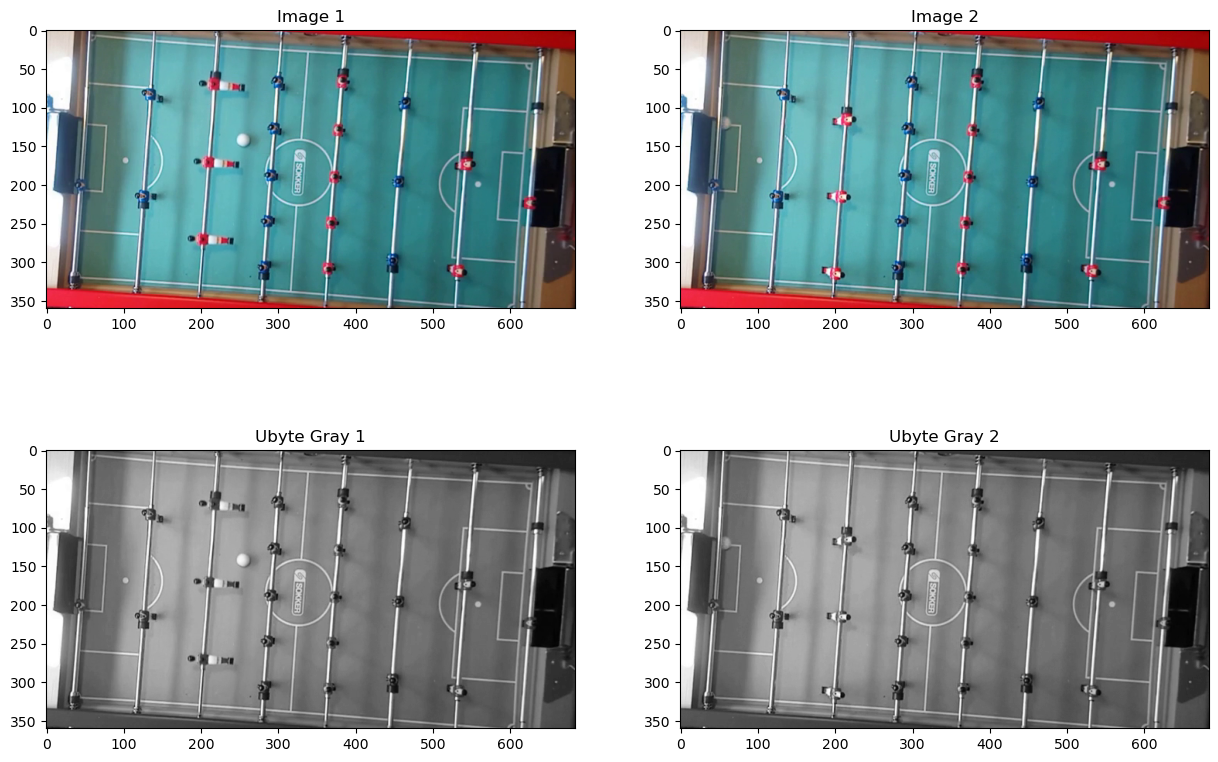

ubyte_gray1 is encoded in uint8 and ubyte_gray2 is encoded in uint8.


In [101]:
# TODO -- Select the two images from our baby-football video and convert them into 'uint8' (also known as ubyte) grayscale images.

%matplotlib inline

# 1. Importing all needed libraries for the image conversion
from skimage.color import rgb2gray
from skimage import img_as_ubyte

# 2. Loading the video named 'video_1_360.mp4' which is located at the folder 'videos/' and storing its frames in a list
video_frames = get_video_frames_from('videos/video_1_360.mp4')

# 3. Selecting the 51th and the 111th frames from the list named 'video_frames'
image1 = video_frames[51]
image2 = video_frames[111]

# 4. Converting the RGB color images into grayscale images
gray1 = rgb2gray(image1)
gray2 = rgb2gray(image2)

# 5. Converting the grayscale images into ubyte grayscale images
ubyte_gray1 = img_as_ubyte(gray1)
ubyte_gray2 = img_as_ubyte(gray2)

# Showing the result
fig = plt.figure(figsize=(15,10))
fig.canvas.header_visible = False
plt.subplot(221)
plt.title("Image 1")

# 6. Preparing a display of the color image 'image1'
plt.imshow(image1)

plt.subplot(222)
plt.title("Image 2")

# 7. Preparing a display of the color image 'image2'
plt.imshow(image2)

plt.subplot(223)
plt.title("Ubyte Gray 1")

# 8. Preparing a display of the ubyte grayscale image 'ubyte_gray1'
plt.imshow(ubyte_gray1, cmap='gray')

plt.subplot(224)
plt.title("Ubyte Gray 2")

# 9. Preparing a display of the ubyte grayscale image 'ubyte_gray2'
plt.imshow(ubyte_gray2, cmap='gray')

# 10. Confirming and really showing the prepared display
plt.show()

# 11. Printing the data types of the images
print(f"ubyte_gray1 is encoded in {ubyte_gray1.dtype} and ubyte_gray2 is encoded in {ubyte_gray2.dtype}.")

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [7]:
plt.close()

In order to witness what happened <font size='5'>🔎</font>, let's do a binarization on those two images by considering a threshold of <font color='maroon'>180</font>.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to apply a binary thresholding on our <font color='maroon'>ubyte</font> grayscale images.</font> <font size='5'>🔨</font>**

<font size='5'>🏹</font> By binarizing our baby-football grayscale images, we hope to clean their contents and keep the ball visible.

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">ubyte_gray1</font>: ubyte grayscale image of baby-football that we got from one of the previous cells
- <font color="maroon">ubyte_gray2</font>: ubyte grayscale image of baby-football that we got from one of the previous cells

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Setting the threshold to <font color="maroon">180</font> (this is what we saw in the previous notebook)
2. <font size='2'>⭕</font> Calling the function <font size='2'>⚙</font> <font color="maroon">bin_threshold(...)</font> in order to transform the baby-football grayscale images <font color="maroon">ubyte_gray1</font> and <font color="maroon">ubyte_gray2</font> to binary images <font color="maroon">bin_res1</font> and <font color="maroon">bin_res2</font>
3. <font size='2'>⭕</font> Showing the results

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here are the fimplified protypes to consider:

<font size='3'>⚙</font> **[bin_threshold(img, threshold)](functions/bin_threshold.html)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> or <font color="maroon">ubyte</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/bin_results_from_ubytes.png"/>

</div>

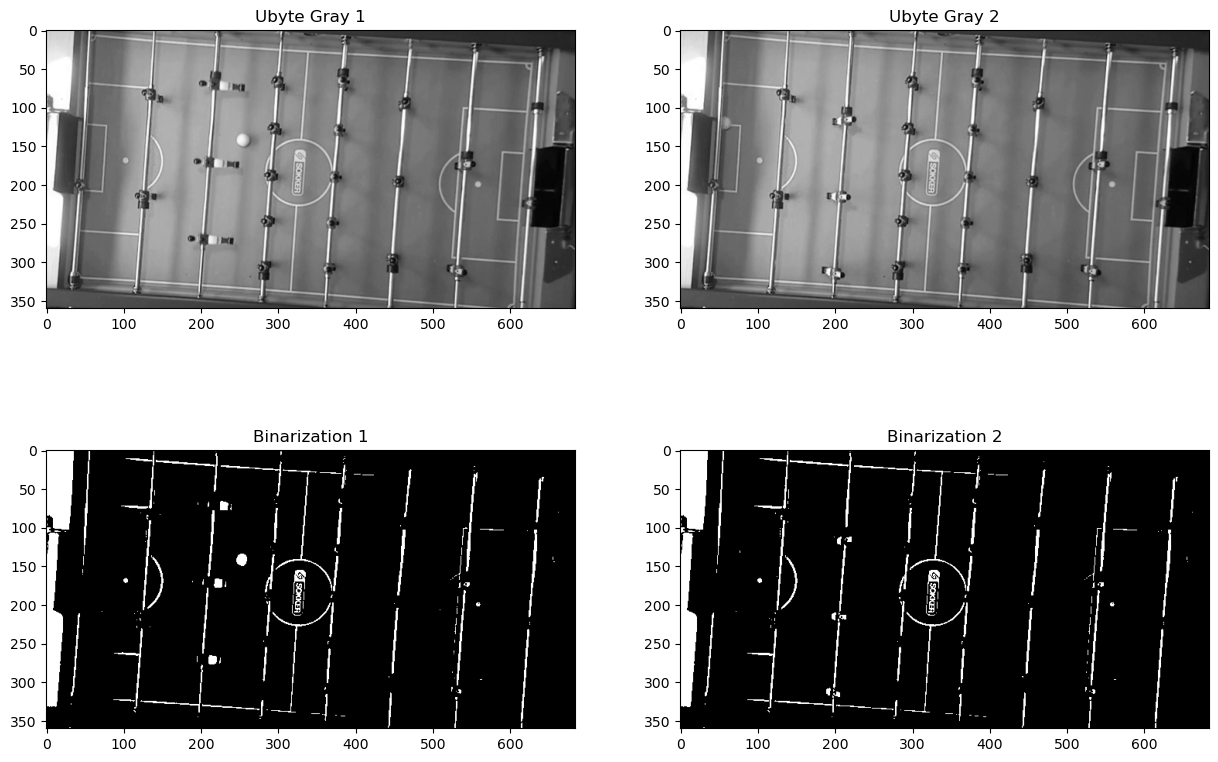

In [12]:
# TODO -- Apply a binary thresholding on our ubyte grayscale images.

%matplotlib inline

# 1. Defining the threshold 'th'
th = 180

# 2. Binarizing the ubyte grayscale images by considering the threshold 'th'
bin_res1 = bin_threshold(ubyte_gray1, th)
bin_res2 = bin_threshold(ubyte_gray2, th)

# 3. Showing the results
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("Ubyte Gray 1")

plt.imshow(ubyte_gray1, cmap='gray')

plt.subplot(222)
plt.title("Ubyte Gray 2")

plt.imshow(ubyte_gray2, cmap='gray')

plt.subplot(223)
plt.title("Binarization 1")

plt.imshow(bin_res1, cmap='gray')

plt.subplot(224)
plt.title("Binarization 2")

plt.imshow(bin_res2, cmap='gray')

plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [13]:
plt.close()

We notice clearly that the <font size='2'>⚽</font> ball is <font size='5'>🙈</font> not visible at all on the binarization result of the second image `image_2`.

<font color="dodgerblue">**But why**</font>  <font size='5'>&#x2753;&#x1F914;</font>

When we look <font color='5'>🔍</font> closely at both the color image `image2` and its gray version `gray2`, we observe a dark region in front of the left <font size='2'>🥅</font> goal cage.

There are some <font size='5'>🌔</font> shadows all around and especially in front of the left <font size='2'>🥅</font> goal cage.

That is clearly what is causing our issue. <font size='5'>🙄</font>

Let's do an image profiling in order to confirm our hypothesis. <font size='5'>🔬</font>

In [15]:
grayscale_image = ubyte_gray2
line_position = 120
%run functions/draw_profile.ipynb

interactive(children=(FloatSlider(value=120.0, continuous_update=False, description='Line position', max=359.0…

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [16]:
plt.close()

We observe that the <font size='5'>⛰</font> mountain corresponding to the  <font size='2'>⚽</font> ball is now smaller than before because of the shadow and it is clearly <font color='maroon'>under</font> the <font color='maroon'>red dashed line threshold</font> value that we chosen.

### <font color="dodgerblue">1.2. Trying to find another threshold</font>

Since our threshold value is not that optimal as we thought, let's try to find a better one. <font size='5'>🔭</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- What is the optimal threshold for our ball detection <font size="5">❓</font> </font> <font size='5'>🔬</font>**

Run the cell code bollow and help yourself with the <font size='5'>📊</font> [image histograms](https://en.wikipedia.org/wiki/Image_histogram) by playing with the slider <font size='5'>&#x1F42D;🖱</font> in order to find the most suitable <font color="maroon">threshold</font> for our case, i.e. highlighting the <font color="maroon">ball</font>.

Be aware that other objects contained in the image could have pixels having the same grayscale intencities as the pixels of our <font color="maroon">object of interest</font> which is the <font color="maroon">ball</font>.

<font size="5">⚠</font> For segmentation step, having a result including artefacts or unwanted objects is not a fail but a big <font size="5">👣</font> step further as long as the <font size='2'>⚽</font> ball is visible and could be recognized later on both of the two images that we considered <font size="5">❗</font>

Indeed, as long as our <font color="maroon">object of interest</font>, i.e. the <font color="maroon">ball</font>, is **visible** and **well seperated** from the rest, there could be hope to extract it later. <font size="5">👍🏽</font>

</div>

In [17]:
g_img1 = ubyte_gray1
g_img2 = ubyte_gray2
%run functions/hist_bin_slider2.ipynb

interactive(children=(FloatSlider(value=180.0, continuous_update=False, description='Threshold', max=255.0, st…

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [18]:
plt.close()

By choosing a threshold value of <font color='maroon'>110</font>, we can see the <font size='2'>⚽</font> ball on the second result but we lost it for the first image. <font size='3'>😲</font>

Plus, we now have big segments, i.e. big white objects, at the middle of our baby-foot field which is not great since we cannot distinguish the ball when it is inside that area.

<img src="figs/bin_results_from_ubytes_th_110.png"/>

Not possible to find an optimal threshold. <font size='5'>😱</font>

### <font color="dodgerblue">1.3. Preprocessing: Image filtering</font>

The ball disappears when entering the shadows.

Before treating our image, an important <font color='maroon'>preprocessing</font> task is required for <font size='2'>❌</font> getting rid of those shadows.

In this part, we will learn a bit about [image filtering](https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html) which can provide us powerful preprocessing <font size='2'>🛠</font> tools.

#### <font color="dodgerblue">1.3.1 Image convolution</font>

Before talking about the different main filtering tools, let's first discover and understand what [image convolution](https://en.wikipedia.org/wiki/Convolution) is.

<font color="dodgerblue">**why?**</font> 

Just because we will see later that <font color='maroon'>applying a filter</font> on an image consists of just <font color='maroon'>applying a convolution</font> on it.

The [convolution](https://en.wikipedia.org/wiki/Convolution#) is a mathematical operation on two functions <font color='blue'><b>$f : \mathbb{R} \rightarrow \mathbb{R}$</b></font> and <font color='blue'><b>$g : \mathbb{R} \rightarrow \mathbb{R}$</b></font> giving <font color='blue'><b>$(f \ast g)$</b></font> as a result.
It is the <font color='maroon'>main <font size='2'>❤</font> core</font> of image filtering.

##### <font color="dodgerblue">**1D Convolution**</font>

In signal processing, a convolution 1D of a signal <font color='blue'><b>$f$</b></font> by considering another signal <font color='blue'><b>$g$</b></font> is defined by the following mathematical formula.

<font color='blue'><b>
$$(f \ast g)(t) = \int_{-\infty}^{+\infty} f(\tau) g (t - \tau)dt \qquad (1)$$
</b></font>

The main idea is to transform the initial signal <font color='blue'><b>$f$</b></font> by:

* inversing the signal <font color='blue'><b>$g$</b></font> (getting its <font color='maroon'>symmetrical</font> version) and
* sliding it all along <font color='blue'><b>$f$</b></font> while operating some modifications.

To illustrate it clearly, let's borrow those two examples took from [wikipedia](https://en.wikipedia.org/wiki/Convolution#).

<img src='figs/Convolution_of_box_signal_with_itself2.gif'>
<img src='figs/Convolution_of_spiky_function_with_box2.gif'>

<font size='2'>[By Convolution_of_box_signal_with_itself.gif and Convolution_of_spiky_function_with_box.gif: Brian Ambergderivative work: Tinos (talk) - Convolution_of_box_signal_with_itself.gif, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=11003835)</font>

We notice here that the signal <font color='blue'><b>$f$</b></font> is modified while sliding the <font color='maroon'>symmetrical version</font> of <font color='blue'><b>$g$</b></font> all along it.

<font size='5'>⚠</font> Be careful! The <font color='blue'><b>$g (t - \tau)$</b></font> part of the formula wich is similar to <font color='blue'><b>$g (-\tau)$</b></font> implies that the second signal <font color='blue'><b>$g$</b></font> must be transformed in order to get its <font color='maroon'>symmetrical form</font>.

The figure bellow, that we also borrowed from [wikipedia](https://en.wikipedia.org/wiki/Convolution#), shows it better.

<img src='figs/Convolution3.svg' width=500>

<font size='2'>[By Krishnavedala - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=37067808)</font>

##### <font color="dodgerblue">**2D Convolution**</font>

We did not mention it yet but an image is initially a <font size='5'>〰</font> <font color='maroon'>signal</font> which is numerized after what we call a signal processing [quantization](https://en.wikipedia.org/wiki/Quantization_(signal_processing)) transforming the continuous values of the signal into 2D discrete values that we have in the <font color='maroon'>matrices</font> representing the image.

The [convolution](https://en.wikipedia.org/wiki/Convolution#) of an image could be easily done either by processing directly its initial <font size='5'>〰</font> <font color='maroon'>signal</font> (that we don't always have) or by applying the same process on its matrices.

For a grayscale image, we can adapt the previous formula as follows:

<font color='blue'><b>
$$(I \ast K)[m,n] = \sum_{i=-\infty}^{+\infty} \sum_{j=-\infty}^{+\infty} I[i,j]J[m-i,n-j] \qquad (2)$$
</b></font>

Where, <font color='blue'><b>$I[i,j]$</b></font> is the matrix of the image and <font color='blue'><b>$i=0,\dots,M-1$, $j=0,\dots,N-1$</b></font> with <font color='blue'><b>$M$</b></font> and <font color='blue'><b>$N$</b></font> the number of lines and columns respectively while <font color='blue'><b>$K$</b></font> represents the second matrix.

The 2D convolution process, is done by using a small matrix (<font color='maroon'>3 x 3</font>, <font color='maroon'>5 x 5</font>,...) called [kernel](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

As shown by the figure bellow, the idea stays the same as before:

* getting the <font color='maroon'>symmetrical</font> version of <font color='blue'><b>$K$</font> and
* <font color='maroon'>sliding</font> (or <font color='maroon'>shifting</font>) it all along the matrix <font color='blue'><b>$I$</b></font> while oparating some modifications.

The <font color='maroon'>sliding</font> (or <font color='maroon'>shifting</font>) is done by putting the origin (usually the center) of the kernel above each cell of the matrix to modify.
This is done from the <font color='maroon'>top left</font> to the <font color='maroon'>bottom right</font> of the matrix.

<img src='figs/2D_Convolution_Animation_2.gif'/>

In this example, the light blue part of the left matrix is the <font color='cornflowerblue'>image to consider</font> <font color='blue'><b>$I$</b></font>, the orange is the <font color='coral'>kernel</font> <font color='blue'><b>$K$</b></font>, the light green is the <font color='green'>convolution 2D</font> result and the dark blue is the posistion of the kernel at each step of the shifting.

To better understand the [convolution](https://en.wikipedia.org/wiki/Convolution#) 2D, feel free to follow this link where we can find another [2D convolution examples](http://www.songho.ca/dsp/convolution/convolution2d_example.html).

The result <font color='blue'><b>$(I \ast K)[1, 1]$</b></font> of the cell at the position <font color='blue'><b>$i=1$</b></font> and <font color='blue'><b>$j=1$</b></font> is computed as follows:

```
( 60 x   0 ) + (113 x (-1)) + ( 56 x   0 ) +
( 73 x (-1)) + (121 x   5 ) + ( 54 x (-1)) +
(131 x   0 ) + ( 99 x (-1)) + (115 x   0 )
= 266
```

<font size='5'>⚠</font> Be careful! The computation should be done <font color='red' size='3'>only and only</font> after transforming the <font color='coral'>kernel</font> <font color='blue'><b>$K$</b></font> into its <font color='maroon'>symmetrical</font> version, i.e. <font color='green'>flipping it on both vertical and horizontal axis according to its origin</font>.
Otherwise, we get a [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation) instead of a [convolution](https://en.wikipedia.org/wiki/Convolution#).

In this particular example, the symmetry of the kernel <font color='blue'><b>$K$</b></font> is equals to itself so don't be fooled by that. <font size='5'>😉</font>

Remember that we have to <font color='maroon'>flip</font> the kernel <font color='maroon'>twice</font> (first flip on the <font color='maroon'>horizontal axis</font> and a second one on the <font color='maroon'>vertical axis</font>) in order to get its symmetry.

<table>
    <tr>
        <td><b>Fictional kernel example</b></td>
        <td><b>Symmetry of the kernel</b></td>
    </tr>
    <tr>
        <td>
            <table style="border: solid;">
                <tr align="center"">
                    <td style="border: solid; width: 30px; height: 30px;">5</td>
                    <td style="border: solid; width: 30px; height: 30px;">0</td>
                    <td style="border: solid; width: 30px; height: 30px;">2</td>
                </tr>
                <tr align="center">
                    <td style="border: solid; width: 30px; height: 30px;">1</td>
                    <td style="border: solid; width: 30px; height: 30px;">9</td>
                    <td style="border: solid; width: 30px; height: 30px;">3</td>
                </tr>
                <tr align="center">
                    <td style="border: solid; width: 30px; height: 30px;">8</td>
                    <td style="border: solid; width: 30px; height: 30px;">7</td>
                    <td style="border: solid; width: 30px; height: 30px;">4</td>
                </tr>
            </table>
        </td>        
        <td>
            <table style="border: solid;">
                <tr align="center">
                    <td style="border: solid; width: 30px; height: 30px;">4</td>
                    <td style="border: solid; width: 30px; height: 30px;">7</td>
                    <td style="border: solid; width: 30px; height: 30px;">8</td>
                </tr>
                <tr align="center">
                    <td style="border: solid; width: 30px; height: 30px;">3</td>
                    <td style="border: solid; width: 30px; height: 30px;">9</td>
                    <td style="border: solid; width: 30px; height: 30px;">1</td>
                </tr>
                <tr align="center"">
                    <td style="border: solid; width: 30px; height: 30px;">2</td>
                    <td style="border: solid; width: 30px; height: 30px;">0</td>
                    <td style="border: solid; width: 30px; height: 30px;">5</td>
                </tr>
            </table>
        </td>        
    </tr>
</table>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- What is the convolution value of <font size="5">❓</font> </font> <font size='5'>🔬</font>**

Be <font color='blue'></b>$I$</b></font> the image of size <font color='blue'><b>5 × 5</b></font>:
```
1 2 3 2 1
1 2 3 2 1
1 2 3 2 1
1 2 3 2 1
1 2 3 2 1
```

<br>
and the convolution kernel <font color='blue'><b>$K$</b></font>:

```
1 0 -1
```

<br>
What is the convolution value of <font color='maroon' size='5'>?</font> in the result bellow?

```
. . . . .
. ? . . .
. . . . .
. . . . .
. . . . .
```

</div>

There are many python functions allowing us to compoute a 2d convolution such as <font size='2'>⚙</font> [<font color='maroon'>numpy.convolve(...)</font>](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html),  <font size='2'>⚙</font> [<font color='maroon'>scipy.ndimage.convolve(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html),  <font size='2'>⚙</font> [<font color='maroon'>scipy.signal.convolve(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html'),  <font size='2'>⚙</font> [<font color='maroon'>scipy.signal.fftconvolve(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html) or  <font size='2'>⚙</font> [<font color='maroon'>scipy.signal.convolve2d(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) but let's use <font size='2'>⚙</font> [<font color='maroon'>scipy.signal.convolve2d(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) which is more optimized for 2D signals (so images).

Feel free to take a <font size='5'>👀</font> look at the official documentation <font size='2'>🔗</font> [<font color='maroon'>scipy.signal.convolve2d(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

Let's first consider a toy example of a grayscale image <font color='blue'><b>$I$</b></font> (represented here by 1 matrix) and a kernel <font color='blue'><b>$K$</b></font> of <font color='blue'>$3 \times 3$</font>.

In [19]:
img_test = np.array([[60,113,56,139,85],
                     [73,121,54,84,128],
                     [131,99,70,129,127],
                     [80,57,115,69,134],
                     [104,126,123,95,130]])
kernel_test = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
print("The image 'I' to consider is")
print(img_test)
print("\nThe kernel 'K' is")
print(kernel_test)

The image 'I' to consider is
[[ 60 113  56 139  85]
 [ 73 121  54  84 128]
 [131  99  70 129 127]
 [ 80  57 115  69 134]
 [104 126 123  95 130]]

The kernel 'K' is
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to apply a convolution on an image <font color='blue'><b>$I$</b></font> by a kernel <font color='blue'><b>$K$</b></font>.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variables ready to use:</font>**

- <font color="maroon">img_test</font>: image <font color='blue'><b>$I$</b></font> to consider
- <font color="maroon">kernel_test</font>: kernel <font color='blue'><b>$K$</b></font> to use

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing the function <font size='2'>⚙</font> [<font color='maroon'>convolve2d(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) from <font size='2'>📚</font> [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)
2. <font size='2'>⭕</font> Using the function <font size='2'>⚙</font> [<font color='maroon'>convolve2d(...)</font>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) to do a convolution of the image  <font color='blue'><b>$I$</b></font> by considering the kernel <font color='blue'><b>$K$</b></font>
3. <font size='2'><font size='2'>✅</font></font> Printing the result

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:

<font size='3'>⚙</font> **[convolve2d(image_I, kernl_K)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)**
- **Parameters**
    - image_I: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - kernel_K: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (kernel image to use)
- **Return**
    - binary_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (convolution result)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
Result '(I * K)' of the convolution of the image 'I' by the kernel 'K':
[[   0  -60 -113  -56 -139  -85    0]
 [ -60  114  328  -26  470  158  -85]
 [ -73   53  266  -61  -30  344 -128]
 [-131  403  116  -47  295  244 -127]
 [ -80  108 -135  256 -128  344 -134]
 [-104  314  346  279  153  421 -130]
 [   0 -104 -126 -123  -95 -130    0]]
```

</div>

In [23]:
# TODO -- Apply a convolution on an image 'I' by a kernel 'K'.

# 1. Importing the function 'convolve2d(...)' from 'scipy.signal'
from scipy.signal import convolve2d

# 2. Using the function 'convolve2d(...)' to do a convolution of the image 'I' by considering the kernel 'K'
img_test_convolve = convolve2d(img_test, kernel_test)

# 3. Printing the result
print("Result '(I * K)' of the convolution of the image 'I' by the kernel 'K':")
print(img_test_convolve)

Result '(I * K)' of the convolution of the image 'I' by the kernel 'K':
[[   0  -60 -113  -56 -139  -85    0]
 [ -60  114  328  -26  470  158  -85]
 [ -73   53  266  -61  -30  344 -128]
 [-131  403  116  -47  295  244 -127]
 [ -80  108 -135  256 -128  344 -134]
 [-104  314  346  279  153  421 -130]
 [   0 -104 -126 -123  -95 -130    0]]


Something does not seem to be wright <font size='2'>❗</font><font size='5'>🤔</font>

<font color='dodgerblue'>**What happened**</font><font size='5'>❓</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to compare the shape of the image <font color='blue'><b>$I$</b></font> with the shape of the convolution result <font color='blue'><b>$(I * K)$</b></font>.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variables ready to use:</font>**

- <font color="maroon">img_test</font>: image <font color='blue'><b>$I$</b></font> to consider
- <font color="maroon">kernel_test</font>: kernel <font color='blue'><b>$K$</b></font> to use
- <font color="maroon">img_test_convolve</font>: convolution result <font color='blue'><b>$(I * K)$</b></font> we got above.

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Getting the shape of the image <font color="maroon">img_test</font> that we considered
2. <font size='2'>⭕</font> Getting the shape of the kernel <font color="maroon">kernel_test</font> that we used
3. <font size='2'>⭕</font> Getting the shape of the convolution <font color="maroon">img_test_convolve</font> that we got
4. <font size='2'>✅</font> Printing the results

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:

<font size='3'>⚙</font> **[np.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)**
- **Parameters**
    - matrix: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) 
- **Return**
    - shape: [tuple](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.w3schools.com/python/python_tuples.asp&ved=2ahUKEwi_77fkibCHAxUdfKQEHfM7AGQQFnoECBoQAQ&usg=AOvVaw1C2sCQeh8bN3VZJJt0Gsox) of ints giving the dimensions of the matrix
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [np.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
Shape of 'I': (5, 5)
Shape of 'K': (3, 3)
Shape of '(I * K)': (7, 7)
```

</div>

In [24]:
# TODO -- Compare the shape of the image 'I' with the shape of the convolution result '(I * K)'

# 1. Getting the shape of the image 'img_test' that we considered
img_test_shape = img_test.shape

# 2. Getting the shape of the kernel 'kernel_test' that we used
kernel_test_shape = kernel_test.shape

# 3. Getting the shape of the convolution 'img_test_convolve' that we got
img_test_convolve_shape = img_test_convolve.shape

# 4. Printing the results
print(f"Shape of 'I': {img_test_shape}")
print(f"Shape of 'K': {kernel_test_shape}")
print(f"Shape of '(I * K)': {img_test_convolve_shape}")

Shape of 'I': (5, 5)
Shape of 'K': (3, 3)
Shape of '(I * K)': (7, 7)


We observe that the dimension of the image <font color='blue'><b>$I$</b></font> is <font color='blue'><b>$5 \times 5$</b></font> although the dimension of the convolution result <font color='blue'><b>$(I * K)$</b></font> is <font color='blue'><b>$7 \times 7$</b></font>.

##### <font color="dodgerblue">**Border side effect**</font>

As we saw in the 1D convolution, the resulting signal of the convolution is larger than the original signal.

For the 2D convolution, we also see that when we shift the kernel on all cells of the initial matrix, we observe an overflow when it reaches the border of the initial matrix.

<img src='figs/2D_Convolution_Animation_2.gif' width='500'/>

In our example, we observe an <font color='maroon'>overflow</font> of 2 cells for both the rows (one above and one bellow) and the columns (one on the left and one on the right).

It is because we had a kernel <font color='blue'><b>$K$</b></font> of dimension <font color='blue'><b>$3 \times 3$</font>.

Because of this border side effect, we have to consider two important parameters when we wish to do a convolution:

* the **boundary** (what values to put inside the overflows?)
* and the **mode** (what is the size of the resulting matrix?)

###### <font color="dodgerblue">**Convolution boundary**</font>

The border <font color='maroon'>overflow</font> affects the convolution result around the border of the image.

Indeed, the computation of the convolution result will require values that are outside of the image.

It is then important to choose what values to put inside those outsider cells.

By observing the table bellow, take a time to understand how each <font color='maroon'>boundary</font> option <font color='red'>'fill'</font>, <font color='red'>'symm'</font> and <font color='red'>'wrap'</font> defines the values to put inside the overflow cells.

<table>
    <tr style="background-color:gray; color:white;" align='center'>
        <td><b>Image</b></td>
        <td><b>boundary='fill'</b></td>
        <td><b>boundary='symm'</b></td>
        <td><b>boundary='wrap'</b></td>
    </tr>
    <tr style="background-color:white;">      
        <td>
            <pre>
img ((5, 5)):
                
[[1 2 2 2 3]
 [1 2 2 2 3]
 [1 2 2 2 3]
 [1 2 2 2 3]
 [1 2 2 2 3]]
            </pre>
        </td>
        <td>
            <pre>
cfill ((7, 7)):
[[0 0 0 0 0 0 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 0 0 0 0 0 0]]
            </pre>
        </td>
        <td>
            <pre>
csymm ((7, 7)):
[[1 1 2 2 2 3 3]
 [1 1 2 2 2 3 3]
 [1 1 2 2 2 3 3]
 [1 1 2 2 2 3 3]
 [1 1 2 2 2 3 3]
 [1 1 2 2 2 3 3]
 [1 1 2 2 2 3 3]]
            </pre>
        </td>
        <td>
            <pre>
cwrap ((7, 7)):
[[3 1 2 2 2 3 1]
 [3 1 2 2 2 3 1]
 [3 1 2 2 2 3 1]
 [3 1 2 2 2 3 1]
 [3 1 2 2 2 3 1]
 [3 1 2 2 2 3 1]
 [3 1 2 2 2 3 1]]
            </pre>
        </td>        
    </tr>
</table>

* `boundary='fill'` just puts <font color='red'>zeros</font> in the outsider cells. This will tend to add a <font color='maroon'>dark border</font> around the image.
* `boundary='symm'` considers the <font color='red'>symmetrical values</font> according to the border axis. By doing so, we consider the values of the neighbors so the result will be <font color='maroon'>more ralistic</font> even if it remains fictional.
* `boundary='wrap'` is what we think what it is. Yes like the food named <font size='5'>🌯</font> [Wrap](https://en.wikipedia.org/wiki/Wrap_(food)), the image is rolled up so the values to consider are the ones that are at the <font color='red'>opposite side</font> of the border.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to test the different 2D convolution boundary options.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variables ready to use:</font>**

- <font color="maroon">img_test</font>: image <font color='blue'><b>$I$</b></font> to consider
- <font color="maroon">kernel_test</font>: kernel <font color='blue'><b>$K$</b></font> to use
- <font color="maroon">img_test_convolve</font>: convolution result <font color='blue'><b>$(I * K)$</b></font> we got above.

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

Doing a convolution of <font color="maroon">img_test</font> by the kernel <font color="maroon">kernel_test</font> while:

1. <font size='2'>⭕</font> Using the <font color='red'>'fill'</font> boundary option
2. <font size='2'>⭕</font> Using the <font color='red'>'symm'</font> boundary option
3. <font size='2'>⭕</font> Using the <font color='red'>'wrap'</font> boundary option
4. <font size='2'>✅</font> Printing the results

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:

<font size='3'>⚙</font> **[convolve2d(image_I, kernel_K, boundary)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)**
- **Parameters**
    - image_I: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - kernel_K: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (kernel image to use)
    - boundary: [str](https://docs.python.org/3/library/string.html) (how to fill the border overflow)
- **Return**
    - binary_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (convolution result)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
Result '(I * K)' of the convolution with a 'fill' boundary.
[[   0  -60 -113  -56 -139  -85    0]
 [ -60  114  328  -26  470  158  -85]
 [ -73   53  266  -61  -30  344 -128]
 [-131  403  116  -47  295  244 -127]
 [ -80  108 -135  256 -128  344 -134]
 [-104  314  346  279  153  421 -130]
 [   0 -104 -126 -123  -95 -130    0]]

Result '(I * K)' of the convolution with a 'symm' boundary.
[[  -6   -6  215  -82  331  -12  -12]
 [  -6   -6  215  -82  331  -12  -12]
 [ -20  -20  266  -61  -30  216  216]
 [ 272  272  116  -47  295  117  117]
 [  28   28 -135  256 -128  210  210]
 [ 106  106  220  156   58  161  161]
 [ 106  106  220  156   58  161  161]]

Result '(I * K)' of the convolution with a 'wrap' boundary.
[[ 232  124  233  223   14  232  124]
 [ -32  -75  202 -149  375  -32  -75]
 [ 271  -75  266  -61  -30  271  -75]
 [ 113  276  116  -47  295  113  276]
 [ 264  -26 -135  256 -128  264  -26]
 [ 232  124  233  223   14  232  124]
 [ -32  -75  202 -149  375  -32  -75]]
```

</div>

In [25]:
# TODO -- Test the different 2D convolution boundary options.

# 1. Doing a convolution of 'img_test' by the kernel 'kernel_test' while using the 'fill' boundary option
convolve_test_fill = convolve2d(img_test, kernel_test, boundary='fill')

# 2. Doing a convolution of 'img_test' by the kernel 'kernel_test' while using the 'symm' boundary option
convolve_test_symm = convolve2d(img_test, kernel_test, boundary='symm')

# 3. Doing a convolution of 'img_test' by the kernel 'kernel_test' while using the 'wrap' boundary option
convolve_test_wrap = convolve2d(img_test, kernel_test, boundary='wrap')

# 4. Print the results
print("Result '(I * K)' of the convolution with boundary='fill'.")
print(f"{convolve_test_fill}\n")
print("Result '(I * K)' of the convolution with boundary='symm'.")
print(f"{convolve_test_symm}\n")
print("Result '(I * K)' of the convolution with boundary='wrap'.")
print(f"{convolve_test_wrap}\n")

Result '(I * K)' of the convolution with boundary='fill'.
[[   0  -60 -113  -56 -139  -85    0]
 [ -60  114  328  -26  470  158  -85]
 [ -73   53  266  -61  -30  344 -128]
 [-131  403  116  -47  295  244 -127]
 [ -80  108 -135  256 -128  344 -134]
 [-104  314  346  279  153  421 -130]
 [   0 -104 -126 -123  -95 -130    0]]

Result '(I * K)' of the convolution with boundary='symm'.
[[  -6   -6  215  -82  331  -12  -12]
 [  -6   -6  215  -82  331  -12  -12]
 [ -20  -20  266  -61  -30  216  216]
 [ 272  272  116  -47  295  117  117]
 [  28   28 -135  256 -128  210  210]
 [ 106  106  220  156   58  161  161]
 [ 106  106  220  156   58  161  161]]

Result '(I * K)' of the convolution with boundary='wrap'.
[[ 232  124  233  223   14  232  124]
 [ -32  -75  202 -149  375  -32  -75]
 [ 271  -75  266  -61  -30  271  -75]
 [ 113  276  116  -47  295  113  276]
 [ 264  -26 -135  256 -128  264  -26]
 [ 232  124  233  223   14  232  124]
 [ -32  -75  202 -149  375  -32  -75]]



###### <font color="dodgerblue">**Convolution mode**</font>

Because of the border side effect, we also have to consider the <font color='maroon'>mode</font> to use while applying a convolution on an image.

It helps to define which part of the image would we like to really consider for the result.

The table bellow, shows the convolution result for each mode <font color='red'>'full'</font>, <font color='red'>'valid'</font> and <font color='red'>'same'</font>.

<table>
    <tr style="background-color:gray; color:white;" align='center'>
        <td><b>Image</b></td>
        <td><b>mode='full'</b></td>
        <td><b>mode='valid'</b></td>
        <td><b>mode='same'</b></td>
    </tr>
    <tr style="background-color:white;">      
        <td style=" vertical-align: top;">
            <pre>
img ((5, 5)):
                
 [[1 2 2 2 3]
  [1 2 2 2 3]
  [1 2 2 2 3]
  [1 2 2 2 3]
  [1 2 2 2 3]]
            </pre>
        </td>
        <td style=" vertical-align: top;">
            <pre>
cfull ((7, 7)):
[[0 0 0 0 0 0 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 1 2 2 2 3 0]
 [0 0 0 0 0 0 0]]
            </pre>
        </td>
        <td style=" vertical-align: top;">
            <pre>
cvalid ((3, 3)):


  [[2 2 2]
   [2 2 2]
   [2 2 2]]
            </pre>
        </td>
        <td style=" vertical-align: top;">
            <pre>
csame ((5, 5)):

 [[1 2 2 2 3]
  [1 2 2 2 3]
  [1 2 2 2 3]
  [1 2 2 2 3]
  [1 2 2 2 3]]
            </pre>
        </td>        
    </tr>
</table>

If the dimension of the kernel is $kr \times kc$, the <font color='maroon'>overflows</font> would be:

<font color='blue'><b>
$$
row\_overflow = kr - 1
$$
$$
column\_overflow = kc - 1
$$
</b></font>

The <font color='blue'><b>$-1$</b></font> is because we do not consider the <font color='maroon'>origin</font> of the kernel which will not cross the border of the initial matrix to consider during the shifting.

If the kernel has a square dimension, the overflow would be the same for both vertical and horizontal axis.

The final dimension of the convolution result is defined by the <font color='marron'>mode</font> option:

- `mode='full'` will keep the union of the matrix to consider and the kernel.

<font color='blue'><b>
$$
conv\_dimension = image\_dimension + overflow
$$
</b></font>

- `mode='valid'` will keep the intersection of the matrix to consider and the kernel.

<font color='blue'><b>
$$
conv\_dimension = image\_dimension - overflow
$$
</b></font>

- `mode='same'` will produse a result having the same dimension as the input image.

<font color='blue'><b>
$$
conv\_dimension = image\_dimension
$$
</b></font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- What 'boundary' and 'mode' parameters are considered in the example bellow?.</font> <font size='5'>🔨</font>**

If the dimension of the image <font color='blue'><b>$I$</b></font> is <font color='blue'><b>$100 \times 100$</b></font> and the kernel <font color='blue'><b>$K$</b></font> is <font color='blue'><b>$5 \times 5$</b></font>, what would be the output dimensions for each mode options <font color='3'>❓</font>

|     Convolution mode            | Dimension of the convolution result |
|---------------------------------|-------------------------------------|
|<font color='red'>'full'</font>  | ?                                   |
|<font color='red'>'valid'</font> | ?                                   |
|<font color='red'>'same'</font>  | ?                                   |

<font color='dodgerblue'>Double click on this comment cell, replace the <font color='3'>❓</font> with your answers and run it.</fonf>

</div>

Let's now test the different convolution mode options.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to test the different 2D convolution mode options.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variables ready to use:</font>**

- <font color="maroon">img_test</font>: image <font color='blue'><b>$I$</b></font> to consider
- <font color="maroon">kernel_test</font>: kernel <font color='blue'><b>$K$</b></font> to use
- <font color="maroon">img_test_convolve</font>: convolution result <font color='blue'><b>$(I * K)$</b></font> we got above.

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

Doing a convolution of <font color="maroon">img_test</font> by the kernel <font color="maroon">kernel_test</font> while:

1. <font size='2'>⭕</font> Using the <font color='red'>'full'</font> mode option
2. <font size='2'>⭕</font> Using the <font color='red'>'valid'</font> mode option
3. <font size='2'>⭕</font> Using the <font color='red'>'same'</font> mode option
4. <font size='2'>✅</font> Printing the results

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:

<font size='3'>⚙</font> **[convolve2d(image_I, kernel_K, mode)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)**
- **Parameters**
    - image_I: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - kernel_K: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (kernel image to use)
    - mode: [str](https://docs.python.org/3/library/string.html) (what to keep in the result so what is the shape of the output)
- **Return**
    - binary_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (convolution result)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
Result '(I * K)' of the convolution with a 'full' mode. The shape is (7, 7).
[[   0  -60 -113  -56 -139  -85    0]
 [ -60  114  328  -26  470  158  -85]
 [ -73   53  266  -61  -30  344 -128]
 [-131  403  116  -47  295  244 -127]
 [ -80  108 -135  256 -128  344 -134]
 [-104  314  346  279  153  421 -130]
 [   0 -104 -126 -123  -95 -130    0]]

Result '(I * K)' of the convolution with a 'valid' mode. The shape is (3, 3).
[[ 266  -61  -30]
 [ 116  -47  295]
 [-135  256 -128]]

Result '(I * K)' of the convolution with a 'same' mode. The shape is (5, 5).
[[ 114  328  -26  470  158]
 [  53  266  -61  -30  344]
 [ 403  116  -47  295  244]
 [ 108 -135  256 -128  344]
 [ 314  346  279  153  421]]
```

</div>

In [27]:
# TODO -- Test the different 2D convolution mode options.

# 1. Doing a convolution of 'img_test' by the kernel 'kernel_test' while using the 'full' mode option
convolve_test_full = convolve2d(img_test, kernel_test, mode='full')

# 2. Doing a convolution of 'img_test' by the kernel 'kernel_test' while using the 'valid' mode option
convolve_test_valid = convolve2d(img_test, kernel_test, mode='valid')

# 3. Doing a convolution of 'img_test' by the kernel 'kernel_test' while using the 'same' mode option
convolve_test_same = convolve2d(img_test, kernel_test, mode='same')

# 4. Printing the results
print(f"Result '(I * K)' of the convolution with a 'full' mode. The shape is {convolve_test_full.shape}.")
print(f"{convolve_test_full}\n")
print(f"Result '(I * K)' of the convolution with a 'valid' mode. The shape is {convolve_test_valid.shape}.")
print(f"{convolve_test_valid}\n")
print(f"Result '(I * K)' of the convolution with a 'same' mode. The shape is {convolve_test_same.shape}.")
print(f"{convolve_test_same}\n")

Result '(I * K)' of the convolution with a 'full' mode. The shape is (7, 7).
[[   0  -60 -113  -56 -139  -85    0]
 [ -60  114  328  -26  470  158  -85]
 [ -73   53  266  -61  -30  344 -128]
 [-131  403  116  -47  295  244 -127]
 [ -80  108 -135  256 -128  344 -134]
 [-104  314  346  279  153  421 -130]
 [   0 -104 -126 -123  -95 -130    0]]

Result '(I * K)' of the convolution with a 'valid' mode. The shape is (3, 3).
[[ 266  -61  -30]
 [ 116  -47  295]
 [-135  256 -128]]

Result '(I * K)' of the convolution with a 'same' mode. The shape is (5, 5).
[[ 114  328  -26  470  158]
 [  53  266  -61  -30  344]
 [ 403  116  -47  295  244]
 [ 108 -135  256 -128  344]
 [ 314  346  279  153  421]]



###### <font color="dodgerblue">**Combining the Convolution mode and the boundary options**</font>

By default the mode is <font color='red'>'full'</font> and the boundary is <font color='red'>'fill'</font>.

We can combine the two options by specifying them excplicitly.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Use the cell code bellow to experiment various combinations of the convolution mode and boundary options.</font> <font size='5'>🔭</font>**

In this exercice, take your time and use different combinations of the mode and the boundary parameters.

Feel free to create as more variables as you need and to test as many combinations as you want.

**<font size='2'>✨</font> <font color='teal'>Variables ready to use:</font>**

- <font color="maroon">img_test</font>: image <font color='blue'><b>$I$</b></font> to consider
- <font color="maroon">kernel_test</font>: kernel <font color='blue'><b>$K$</b></font> to use
- <font color="maroon">img_test_convolve</font>: convolution result <font color='blue'><b>$(I * K)$</b></font> we got above.

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

Doing a convolution of <font color="maroon">img_test</font> by the kernel <font color="maroon">kernel_test</font> while:

1. <font size='2'>⭕</font> Choosing various combinations of mode and boundary
2. <font size='2'>⭕</font> Printing the results

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:

<font size='3'>⚙</font> **[convolve2d(image_I, kernel_K, mode, boundary)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)**
- **Parameters**
    - image_I: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - kernel_K: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (kernel image to use)
    - mode: [str](https://docs.python.org/3/library/string.html) (what to keep in the result so what is the shape of the output)
    - boundary: [str](https://docs.python.org/3/library/string.html) (how to fill the border overflow)
- **Return**
    - binary_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (convolution result)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

<font color='dodgerblue'><b>Try to understand the various results.</b></font> <font size='5'>🔬</font>

</div>

In [ ]:
# TODO -- Experiment various combinations of the convolution mode and boundary options.

# 1. Choosing various combinations of mode and boundary
convolve_test_combine = # ADD YOUR CODE HERE

# AND HERE

# AND HERE

# AND HERE

# AND ...

# ...

# 2. Printing the results (feel free to duplicate the following codes do print other outputs)
print(f"Convolution Result '(I * K)' using the combination of the mode and the boundary parameters.")
print(f"{convolve_test_combine}\n")

# AND HERE

# AND HERE


<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- What 'boundary' and 'mode' parameters are considered in the example bellow?.</font> <font size='5'>🔨</font>**

The figure bellow that we borrowed from [wikipedia](https://en.wikipedia.org/wiki/Convolution#) shows an example of 2D convolution computation.

<img src='figs/2D_Convolution_Animation.gif'/>

<font size=2>[By Michael Plotke - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=24288958)</font>

</div>

<b>Your Answer</b>

- boundary: symm / wrap
- mode: same


Now that we know what a convolution is and how to do a 2D convolution, applying a filter on an image is really easy.

Indeed, we already understood that the image convolution is the <font color='maroon'>main <font size='2'>❤</font> core</font> of [image filtering](https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html) tasks.

For each type of filters (e.g. <font color='maroon'>low-pass</font>, <font color='maroon'>high-pass</font>,...), we <font color='green'>just have to do a convolution</font> while only the <font color='maroon'>choice of the kernel</font> <font color='blue'><b>$k$</b></font> differs.

In the field of image processing, filters are meant to alter the content of the image and gives us powerful <font size='2'>🛠</font> tools for the preprocessing step.

<font size='5'>⚠</font> Filters can help us to enhance our image but be careful since it also can degrade its contents.

#### <font color="dodgerblue">1.3.3. Low-pass filter</font>

When we talk about image filtering, we should first remind ourself that an image can also be considered as a <font size='5'>〰</font> <font color='maroon'>signal</font>.
We can then think of an [image filtering](https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html) as similar as a <font size='5'>〰</font> <font color='maroon'>signal</font> filtering.

In the field of signal processing, a **[low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter)** is designed to only <font color='green'>let the low frequencies (according to a threshold) to pass</font> and to block the rest, i.e. <font color='red'>blocks the high-pass frequences</font>.

To make it simple, let's say that in an image, <font color='coral'>high frequencies</font> are usually the details contained in it (e.g. <font color='coral'>object outlines</font>, <font color='coral'>noises</font>, <font color='coral'>artifacts</font>...).

Applying a [low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter) will **mitigate** such high frequencies but also will <font color='green'>add a blurry smoohting effect</font>.

##### <font color="dodgerblue">**Gaussian noise**</font>

As the <font color='maroon'>noises</font> are usually high frequences, the [low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter) can help us to <font color='maroon'>reduce</font> them.

The [Gaussian noise](https://en.wikipedia.org/wiki/Gaussian_noise) is a common noise that we can encounter in digital images.
Such noise may be caused by bad illuminations, bad signal transmissions during the aquisition or by other factors.

Without going deeper in the explaination, let's say that the gaussian noise is modeled by a centered gaussian [random variable](https://en.wikipedia.org/wiki/Random_variable) of mean <font color='blue'><b>$\mu=0$</b></font>, i.e. same probabilities for all types of added imperfections, a [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) <font color='blue'><b>$\sigma$</b></font> which mesures dispersion of random variables according to the mean.

Having a low <font color='blue'><b>$\sigma$</b></font> means that the values of the random variables are around the mean <font color='blue'><b>$\mu$</b></font> while having a high <font color='blue'><b>$\sigma$</b></font> means that the values are spread out over a wide range.

In order to understand all of that, let's first make some noise on our baby-football image. <font size='5'>🤘🏼😎🎸</font>

Of course, we will denoise it later by using a low-pass filtering.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Use the cell code bellow to add some gaussian noise on an ubyte grayscale image.</font> <font size='5'>🔭</font>**

In this exercice, choose a <font color='blue'><b>$\sigma$</b></font> and add some gaussian noise on our previous ubyte grayscale image <font color='maroon'>ubyte_gray1</font> by calling the handcrafted function <font size='2'>⚙</font> [add_gaussian_image(...)](functions/add_gaussian_image.html).

Feel free to test different values of <font color='blue'><b>$\sigma$</b></font> <font size='5'>🔬</font>.

**<font size='2'>✨</font> <font color='teal'>Variables ready to use:</font>**

- <font color="maroon">ubyte_gray1</font>: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) ubyte grayscale image

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Load the handcrafted function <font size='2'>⚙</font> [add_gaussian_noise(...)](functions/add_gaussian_noise.html)
2. <font size='2'>⭕</font> Choose a value of the <font color='blue'><b>$\sigma$</b></font> (take your time and try many values)
3. <font size='2'>⭕</font> Calling the function <font size='2'>⚙</font> [add_gaussian_noise(...)](functions/add_gaussian_noise.html) to add a gaussian noise on the ubyte grayscale image <font color='maroon'>ubyte_gray1</font> by considering the chosen <font color='blue'><b>$\sigma$</b></font>
4. <font size='2'>⭕</font> Displaying the result

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:

<font size='3'>⚙</font> **[add_gaussian_noise(image, sigma)](functions/add_gaussian_noise.html)**
- **Parameters**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) considered image
    - sigma: [standard deviation](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Standard_deviation&ved=2ahUKEwjitcu12bCHAxUHRqQEHeafBzAQFnoECB0QAQ&usg=AOvVaw3Css3aQMda0OfDQObxa07O) of the gaussian kernel

- **Return**
    - noisy_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) image havy some noise
 
**<font size='2'>✨</font> <font color='teal'>The output result of <font color='blue'><b>$\sigma = 40$</font>.</font>**

<img src='figs/noisy_image_sigma_40.png'/>

<font color='dodgerblue'><b>Observe the various results.</b></font> <font size='5'>🔬</font>

</div>

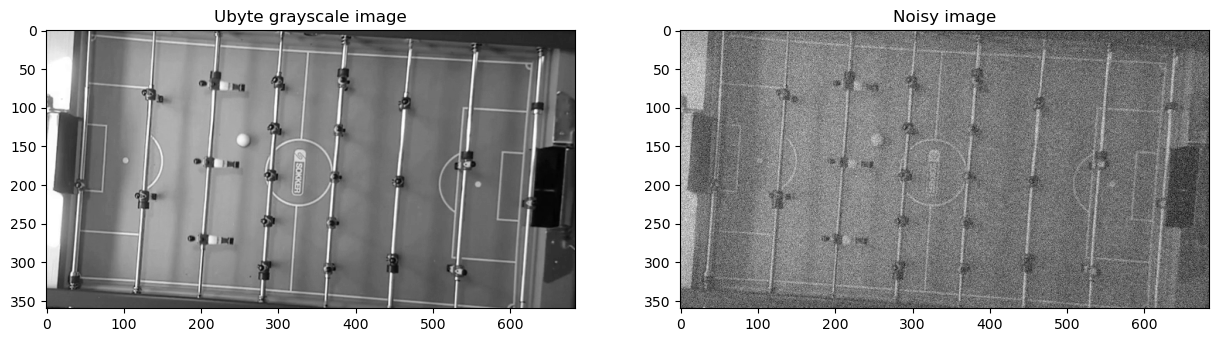

In [30]:
# TODO -- Add some gaussian noise on an ubyte grayscale image.

%matplotlib inline

# 1. Load the function 'add_gaussian_noise(...)'
%run functions/add_gaussian_noise.ipynb

# 2. Choose a value of the sigma (take your time and try many values)
sigma = 40

# 3. Adding a gaussian noise on the ubyte grayscale image 'ubyte_gray1' by considering the chosen sigma
noisy_image = add_gaussian_noise(ubyte_gray1, sigma)

# 4. Displaying the result
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Ubyte grayscale image")

plt.imshow(ubyte_gray1, cmap='gray')

plt.subplot(122)
plt.title("Noisy image")

plt.imshow(noisy_image, cmap='gray')

plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [31]:
plt.close()

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- What is the data type <font color='maroon'>dtype</font> of our previous generated noisy image named <font color='maroon'>noisy_image</font></font><font size='5'>❓</font>**

</div>

In [32]:
noisy_image.dtype

dtype('float64')

<font size='5'>⚠</font> The <font color='maroon'>dtype</font> of the noisy image does not always match what we need so remember to convert it later if needed.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Use the slider to help to see the influence of the value of <font color='blue'><b>$\sigma$</b></font>. </font> <font size='5'>🔭</font>**

Run the cell code bollow and play with the slider <font size='5'>&#x1F42D;🖱</font> in order to see the impact of the value of <font color='blue'><b>$\sigma$</b></font> on the resulted gaussian noisy image.


</div>

In [33]:
%matplotlib inline

image = ubyte_gray1

%run functions/display_gaussian_noise.ipynb

interactive(children=(IntSlider(value=40, description='$\\sigma$', step=5), Output()), _dom_classes=('widget-i…

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [34]:
plt.close()

##### <font color="dodgerblue">**Dealing with the noise**</font>

As told earlier, doing an [image filtering](https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html) is just doing a [convolution](https://en.wikipedia.org/wiki/Convolution#) on the image while <font color='maroon'>choosing the right kernel</font> <font color='blue'><b>$k$</b></font>.

<font color='dodgerblue'>What filter to use</font><font size='3'>❓🤔</font>

Here is an example of a <font color='maroon'>low-pass filter</font>:

<font color='blue'><b>
$K = \displaystyle\frac{1}{9}\begin{bmatrix}1&1&1\\1&1&1\\1&1&1\end{bmatrix}$
</b></font>

This kernel of dimension <font color='blue'><b>$3 \times 3$</b></font> is computing the <font color='maroon'>mean</font> of all neighboring pixels and creates a <font color='maroon'>blur effect</font>.

Such kind of kernel is usually used for [mean filters](https://www.sciencedirect.com/topics/computer-science/mean-filter)_that are known to be efficient to <font color='maroon'>deal with noises</font>.

<font color='dodgerblue'>How to know if a kernel is for a low-pass filtering</font><font size='3'>❓🤔</font>

<font color='green'>Easy, the sum of all the coefficients of a low-pass kernel must be equals to <font color='blue'><b>$1$</b></font>.</font>


Let's first create some low-pass kernels.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Preparing a low-pass mean kernel <font color='blue'><b>$K$</b></font>. </font> <font size='5'>🔭</font>**

If we have the low-pass kernel <font color='blue'><b>$K$</b></font> of size <font color='blue'><b>$5 \times 5$</b></font> bellow, what would be the value of <font size='3'>❓</font>.

<font color='blue'><b>
$K = \displaystyle\frac{1}{?}\begin{bmatrix}1&1&1&1&1\\1&1&1&1&1\\1&1&1&1&1\\1&1&1&1&1\\1&1&1&1&1\end{bmatrix}$
</b></font>

Once you find the value, fill the cell code bellow <font size='5'>👇🏾</font> in order to create various low-pass mean kernels.

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
Mean kernel 3 x 3
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Mean kernel 5 x 5
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]

Mean kernel 7 x 7
[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]
```

</div>

In [37]:
# TODO -- Preparing low-pass mean kernels.

d3 = 3 * 3
d5 = 5 * 5
d7 = 7 * 7

mean_k_3_3 = np.ones((3,3))/d3
mean_k_5_5 = np.ones((5,5))/d5
mean_k_7_7 = np.ones((7,7))/d7

print(f"Mean kernel 3 x 3")
print(f"{mean_k_3_3}\n")
print(f"Mean kernel 5 x 5")
print(f"{mean_k_5_5}\n")
print(f"Mean kernel 7 x 7")
print(f"{mean_k_7_7}\n")

Mean kernel 3 x 3
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Mean kernel 5 x 5
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]

Mean kernel 7 x 7
[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]



Once we have our kernels, we can now apply an [image filtering](https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html) on our image by using them.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to apply a low-pass mean filtering on a gaussian noisy image.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Using the crafted function [add_gaussian_noise(...)](functions/add_gaussian_noise.html) to add some gaussian noise of <font color='blue'><b>$\sigma = 40$</b></font> on our ubyte grayscale image <font color='maroon'>ubyte_gray1</font>
2. <font size='2'>⭕</font> Using [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) to apply a low-pass mean filtering on our <font color='maroon'>noisy_image</font> while using the <font color='red'>'same'</font> mode and <font color='red'>'symm'</font> boundary

3. <font size='2'>✅</font> Displaying the results

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplified prototypes to consider:

<font size='3'>⚙</font> **[add_gaussian_noise(image, sigma)](functions/add_gaussian_noise.html)**
- **Parameters**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) considered image
    - sigma: [standard deviation](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Standard_deviation&ved=2ahUKEwjitcu12bCHAxUHRqQEHeafBzAQFnoECB0QAQ&usg=AOvVaw3Css3aQMda0OfDQObxa07O) of the gaussian kernel

- **Return**
    - noisy_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) image havy some noise
 
<font size='3'>⚙</font> **[convolve2d(image_I, kernel_K, mode, boundary)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)**
- **Parameters**
    - image_I: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - kernel_K: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (kernel image to use)
    - mode: [str](https://docs.python.org/3/library/string.html) (what to keep in the result so what is the shape of the output)
    - boundary: [str](https://docs.python.org/3/library/string.html) (how to fill the border overflow)
- **Return**
    - binary_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (convolution result)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

If you are curious about the displaying function, take look <font size='5'>👀</font> at <font size='2'>🔗</font> [zoom_images(...)](functions/zoom_images.html).

<!-- <font size='5'>&#x26A0;</font> We used the <font color='maroon'>vmin=0</font> and <font color='maroon'>vmax=255</font> of the function <font size='3'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) for displaying the results in order to get something interesting for our human vision but keep in mind that the result of the convolution given by the function <font size='3'>⚙</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) is encoded in float.  -->

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/low-pass-mean-filter-zoom.png"/>

</div>

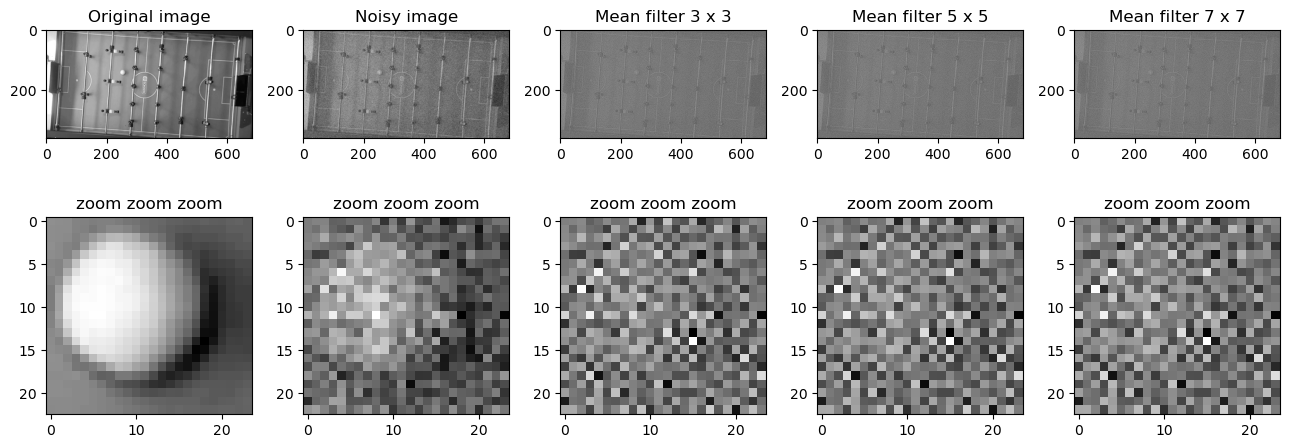

In [39]:
# TODO -- Apply a low-pass mean filtering on a gaussian noisy image.

%matplotlib inline
    
%run functions/zoom_images.ipynb

# 1. Using the crafted function add_gaussian_noise(...) to add some gaussian noise of sigma=40
# on our ubyte grayscale image ubyte_gray1
noisy_image = add_gaussian_noise(ubyte_gray1, sigma=40)

# 2. Using convolve2d(...) to apply a mean low-pass filtering on our noisy_image
# while using the 'same' mode and 'symm' boundary
mean_filter_3_3 = convolve2d(noisy_image, kernel_test, mode='same', boundary='symm')
mean_filter_5_5 = convolve2d(noisy_image, kernel_test, mode='same', boundary='symm')
mean_filter_7_7 = convolve2d(noisy_image, kernel_test, mode='same', boundary='symm')

# 3. Displaying the results
# Preparing the titles and the results to show
img_titles = {
    "Original image": ubyte_gray1,
    "Noisy image": noisy_image,
    "Mean filter 3 x 3": mean_filter_3_3,
    "Mean filter 5 x 5": mean_filter_5_5,
    "Mean filter 7 x 7": mean_filter_7_7,
}

# Zooming on the results
slicex, slicey = slice(133, 156), slice(245, 269)

# Showing the zoom results
zoom_images(img_titles, slicex, slicey)

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [40]:
plt.close()

We notice that the <font color='maroon'>noise</font> can really <font color='maroon'>affects the quality</font> of the content of an image <font size='3'>❗</font>

They can bring some serious issues. <font size='5'>🤔</font>

Dealing with noises is an important task to do if we have them in our image.

In our results, we can observe that the size of our kernel influences the convolution results where the details of the image tends to be lost progressively at the cost of some smootheness.

The choice of the kernel to use is then very very important. <font size='5'>👍🏼</font>

We can first appreciate our qualitative results by observing directly our figure but the choice of the kernel should be done throroughly with some quantitative validations.

To know much about it, check the <font size='2'>🔗</font> [Mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) and also the <font size='2'>🔗</font> [Signal-to-noise ratio (SNR)](https://en.wikipedia.org/wiki/Signal-to-noise_ratio).

Yet our baby-football image is not noisy, we do not think that our process towards a <font size='2'>⚽</font> ball localization could need a denoising step. <font size='5'>😆</font>

We do not want to add some superfluous process that may add a <font size='5'>⏰</font> time cost to our application.

#### <font color="dodgerblue">1.3.2. high-pass filter</font>

In the field of signal processing, **[high-pass filter](https://en.wikipedia.org/wiki/High-pass_filter)** is designed to only <font color='red'>let the high frequencies (according to a threshold) to pass</font> and block the rest, i.e. <font color='red'>blocks the low-pass frequences</font>.

As we saw earlier, <font color='coral'>high frequencies</font> are usually the details contained in it (e.g. <font color='coral'>object outlines</font>, <font color='coral'>noises</font>, <font color='coral'>arfifacts</font>...).

Applying a [high-pass filter](https://en.wikipedia.org/wiki/High-pass_filter) will **strenghten** such high frequencies so they will be more visible in our image.

Be aware that the <font color='coral'>noises</font> are high frequences so they will also be <font color='maroon'>more present</font>.

When we have a non noisy image, strengthening the details could help to highlight the edges and the border of the objects contained in an image but also can enhance the contrast.

<font color='dodgerblue'>What filter to use</font><font size='3'>❓🤔</font>

Here is an example of a high-pass filter:

<font color='blue'><b>
$K = \begin{bmatrix}0&-1&0\\-1&4&-1\\0&-1&0\end{bmatrix}$
</b></font>

<font color='dodgerblue'>How to know if a kernel is for a high-pass filtering?</font><font size='3'>❓🤔</font>

<font color='green'>Easy, the sum of all the coefficients of a high-pass kerner must be equals to <font color='blue'><b>$0$</b></font>.</font>


Let's first create some high-pass kernels.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Preparing a high-pass+ kernel <font color='blue'><b>$K$</b></font>. </font> <font size='5'>🔭</font>**

If we have the high-pass kernels <font color='blue'><b>$K_1$</b></font> and <font color='blue'><b>$K_2$</b></font> of size <font color='blue'><b>$3 \times 3$</b></font> bellow, what would be the values of the origins <font color='blue'><b>$O_1$</b></font> and <font color='blue'><b>$O_2$</b></font><font size='3'>❓</font>

<font color='blue'><b>
$K_1 = \begin{bmatrix}1&1&1\\1&O_1&1\\1&1&1\end{bmatrix}$
$K_2 = \begin{bmatrix}3&3&3\\3&O_2&3\\3&3&3\end{bmatrix}$
</b></font>

Once you find the values, fill the cell code bellow <font size='5'>👇🏾</font> in order to create two high-pass kernels.

</div>

In [42]:
# TODO -- Preparing high-pass kernels.

# Defining the values of the origins of the kernels
o1 = -8
o2 = -24

# Creating the kernels
hp_kernel_1 = np.array([[1,1,1],[1,o1,1],[1,1,1]])
hp_kernel_2 = np.array([[3,3,3],[3,o2,3],[3,3,3]])

# Showing the results
print(f"High-pass kernel 3 x 3")
print(f"{hp_kernel_1}\n")

print(f"High-pass kernel 3 x 3")
print(f"{hp_kernel_2}\n")

High-pass kernel 3 x 3
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]

High-pass kernel 3 x 3
[[  3   3   3]
 [  3 -24   3]
 [  3   3   3]]



Let's now use those high-pass kernels to apply high-pass filters on our ubyte grayscale image.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to apply a high-pass filtering on our ubyte grayscale image.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Using [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) to apply a high-pass mean filtering on our <font color='maroon'>ubyte_gray1</font> while using the <font color='red'>'same'</font> mode and <font color='red'>'symm'</font> boundary

2. <font size='2'>✅</font> Displaying the results

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the simplified prototype to consider:
 
<font size='3'>⚙</font> **[convolve2d(image_I, kernel_K, mode, boundary)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)**
- **Parameters**
    - image_I: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - kernel_K: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (kernel image to use)
    - mode: [str](https://docs.python.org/3/library/string.html) (what to keep in the result so what is the shape of the output)
    - boundary: [str](https://docs.python.org/3/library/string.html) (how to fill the border overflow)
- **Return**
    - binary_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (convolution result)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [convolve2d(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).

If you are curious about the displaying function, take look <font size='5'>👀</font> at the crafted function <font size='2'>🔗</font> [zoom_images(...)](functions/zoom_images.html).


**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/high-pass-mean-filter-zoom.png"/>
</div>

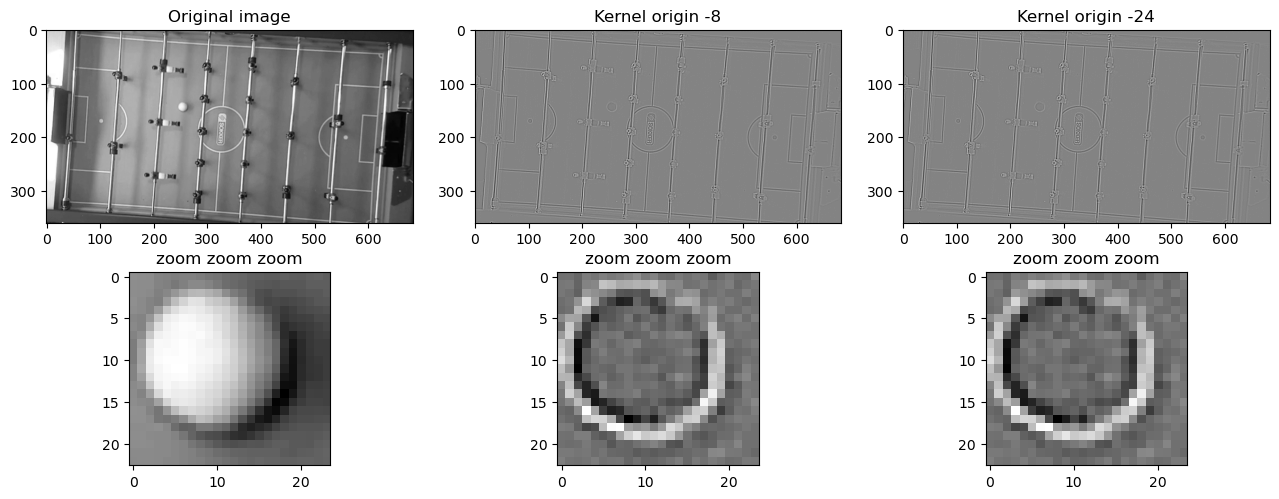

In [44]:
# TODO -- Apply a high-pass filtering on our ubyte grayscale image.

%matplotlib inline

%run functions/zoom_images.ipynb

# 1. Using convolve2d(...) to apply a high-pass filtering on our ubyte_gray1
# while using the 'same' mode and 'symm' boundary
conv_o8 = convolve2d(ubyte_gray1, hp_kernel_1, mode='same', boundary='symm')
conv_o24 = convolve2d(ubyte_gray1, hp_kernel_2, mode='same', boundary='symm')

# 2. Displaying the results
img_titles2 = {
    "Original image": ubyte_gray1,
    "Kernel origin -8": conv_o8,
    "Kernel origin -24": conv_o24,
}

# Zooming
slicex, slicey = slice(133, 156), slice(245, 269)

# Showing
zoom_images(img_titles2, slicex, slicey)

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [45]:
plt.close()

We can see that only the edges and the borders of the objects are visible in the filtering result.

Those filtering results are not the final aim of using high-pass filters.

Indeed, they are intermediate results that will be used later to reach more interesting goals such as edge detection, image sharpening or more.

##### <font color="dodgerblue">**Edge detection**</font>

Two famous operators for edge detection are:

* [Prewitt operator](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Prewitt_operator&ved=2ahUKEwi_jM2Gu6SHAxUMVKQEHZQVA6oQFnoECBUQAQ&usg=AOvVaw0DI5FOXDL-q4S_nFBad8IV)
* [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator)

Those operators uses  [high-pass filtering](https://en.wikipedia.org/wiki/High-pass_filter) but for now, we are not going to <font size='2'>🐟</font> dive deeper since this is not the main subject of this notebook.

Later, for a better understanding of what do they do, fee free to follow this link <font size='2'>🔗</font> [Prewitt operator](https://en.wikipedia.org/wiki/Sobel_operator) and also this one <font size='2'>🔗</font>  [Sobel operator](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel).

In order to gain some times <font size='5'>⌛</font>, let's directly use the predefined functions that <font size='2'>📚</font> [skimage.filters](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.laplace) offers to us:

* <font size='2'>⚙</font> [filters.prewitt(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt)
* <font size='2'>⚙</font> [filters.sobel(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel)

Of course, we will have to do the adequate import.

```
from skimage import filters
```

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to apply the Prewitt and the Sobel filters on a grayscale image to detect the edges.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. Importing <font size='2'>📚</font> [skimage.filters](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.laplace) from <font size='2'>📚</font> [skimage](https://scikit-image.org/docs/stable/api/skimage.html)

2. <font size='2'>⭕</font> Applying the <font size='2'>⚙</font> [filters.prewitt(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt) and the <font size='2'>⚙</font> [filters.sobel(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel) filters on the image <font color='maroon'>ubyte_gray1</font>

3. <font size='2'>✅</font> Displaying the results

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplified prototypes to consider:
 
<font size='3'>⚙</font> [**filters.prewitt(image)**](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt)
- **Parameters**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image from which we want to detect edges)
- **Return**
    - edge_image: [array](https://www.w3schools.com/python/python_arrays.asp) of [float](https://docs.python.org/fr/3/library/functions.html#float) representing the edges contained in the image


<font size='3'>⚙</font> [**filters.sobel(...)**](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel)
- **Parameters**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image from which we want to detect edges)
- **Return**
    - edge_image: [array](https://www.w3schools.com/python/python_arrays.asp) of [float](https://docs.python.org/fr/3/library/functions.html#float) representing the edges contained in the image
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [filters.prewitt(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt) and also this one <font size='2'>🔗</font> [filters.sobel(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel).

If you are curious about the displaying function, take look <font size='5'>👀</font> at the crafted function <font size='2'>🔗</font> [zoom_images(...)](functions/zoom_images.html).


**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/prewitt-sobel-filters.png"/>

</div>

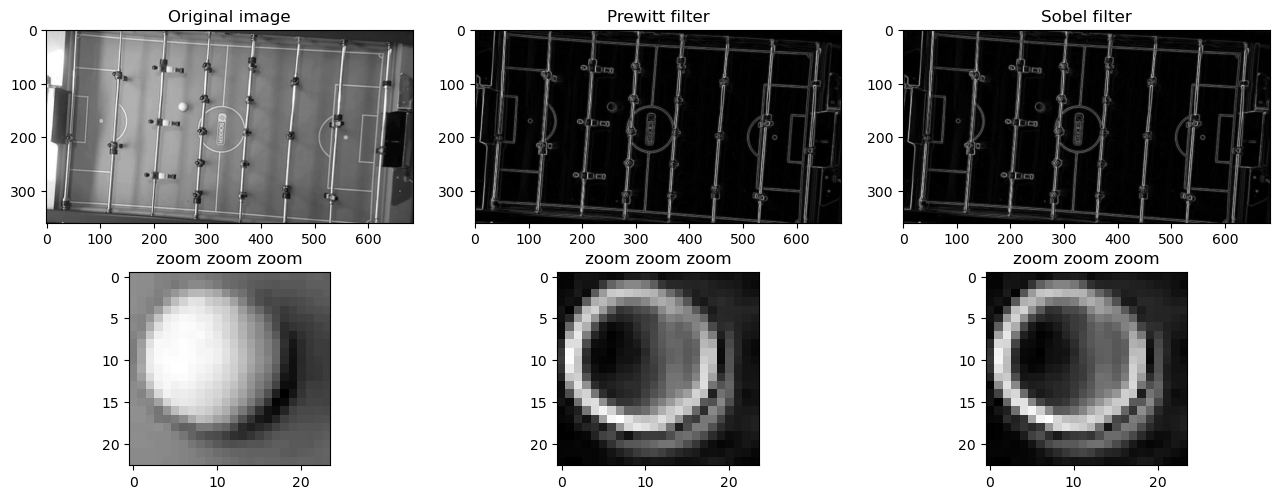

In [46]:
# TODO -- Apply the Prewitt and the Sobel filters on a grayscale image to detect the edges.

%matplotlib inline
    
%run functions/zoom_images.ipynb

# 1. Importing filters from skimage
from skimage import filters

# 2. Applying the Prewitt and the Sobel filters on the image ubyte_gray1
prewitt = filters.prewitt(ubyte_gray1)
sobel = filters.sobel(ubyte_gray1)

# 3. Displaying the results
img_titles3 = {
    "Original image": ubyte_gray1,
    "Prewitt filter": prewitt,
    "Sobel filter": sobel,
}

# Zooming
slicex, slicey = slice(133, 156), slice(245, 269)

# Showing
zoom_images(img_titles3, slicex, slicey)

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [47]:
plt.close()

Yet having the border could be interesting and no information about the shadows seem to be present in the result. <font size='5'>😀</font>

We first aimed to do a naive binary thresholding which is not expensive in terms of time execution but having the edges requires us to change our strategy. <font size='5'>🤔</font>

Let's first see if we can see another better alternative before choosing the right tool that will lead us closer to our goal.

#### <font color="dodgerblue">1.3.4. Band-pass filter</font>

The [band-pass filter](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Band-pass_filter&ved=2ahUKEwiG2sqQ07GHAxVMRaQEHeluCnEQFnoECBwQAQ&usg=AOvVaw3vJoHmyd62RRm24QFZYS6P) is just a sort of a <font color='maroon'>middle alternative</font> to the low-pass and the high-pass filters.

It aims to pass only the frequencies of a <font color='green'>specified range</font> and blocks the rest, i.e. <font color='red'>blocks both the high-pass above and the low-pass bellow</font>.

The [difference of gaussians](https://en.wikipedia.org/wiki/Difference_of_Gaussians) is a band-pass feature helping to suppress the frequencies which are outside of a specified frequency range.
It involves the substraction of a gaussian blurred version of the image from another less blurred version one.

<font color='blue'><b>
$$
Difference\_of\_Gaussians = low\_sigma\_gaussian(image) - high\_sigma\_gaussian(image)
$$</b></font>

Where <font color='blue'><b>$low\_sigma\_gaussian(image)$</b></font> consists of applying a [gaussian filter](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Gaussian_filter&ved=2ahUKEwiUwcSf27GHAxVMVaQEHUXJAUsQFnoECBkQAQ&usg=AOvVaw21nhQ4GtTTbSdtF-pQ0Y8V) with a <font color='blue'>low <b>$\sigma$</b></font> on the image to consider while <font color='blue'><b>$high\_sigma\_gaussian(image)$</b></font> will give the result of a [gaussian filter](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Gaussian_filter&ved=2ahUKEwiUwcSf27GHAxVMVaQEHUXJAUsQFnoECBkQAQ&usg=AOvVaw21nhQ4GtTTbSdtF-pQ0Y8V) with a <font color='blue'>high <b>$\sigma$</b></font> on the image.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to apply a difference of gaussians on our grayscale baby-football images.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

- <font color="maroon">ubyte_gray2:</font> another [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing the needed libraries <font size='2'>📚</font>

2. <font size='2'>⭕</font> Choosing the values of the <font color='blue'>low <b>$\sigma$</b></font> and the <font color='blue'>high <b>$\sigma$</b></font>

3. <font size='2'>⭕</font> Applying a [Gaussian filter](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Gaussian_filter&ved=2ahUKEwiUwcSf27GHAxVMVaQEHUXJAUsQFnoECBkQAQ&usg=AOvVaw21nhQ4GtTTbSdtF-pQ0Y8V) with the <font color='blue'>low <b>$\sigma$</b></font> on our images <font color='maroon'>ubyte_gray1</font> and <font color='maroon'>ubyte_gray2</font>

4. <font size='2'>⭕</font> Applying a [Gaussian filter](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Gaussian_filter&ved=2ahUKEwiUwcSf27GHAxVMVaQEHUXJAUsQFnoECBkQAQ&usg=AOvVaw21nhQ4GtTTbSdtF-pQ0Y8V) with the <font color='blue'>high <b>$\sigma$</b></font> on our images <font color='maroon'>ubyte_gray1</font> and <font color='maroon'>ubyte_gray2</font>

5. <font size='2'>⭕</font> Applying a [difference of Gaussians](https://en.wikipedia.org/wiki/Difference_of_Gaussians)

6. Convert the results into ubytes

7. <font size='2'>✅</font> Displaying the results

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplified prototypes to consider:
 
<font size='3'>⚙</font> [**gaussian(image, sigma)**](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt)
- **Parameters**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - sigma: [standard deviation] for the Gaussian kernel
- **Return**
    - filtered_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> [**img_as_ubyte(image)**](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte)
- **Parameters**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image from which we want to detect edges)
- **Return**
    - ubyte_image: [array](https://www.w3schools.com/python/python_arrays.asp) of [float](https://docs.python.org/fr/3/library/functions.html#float) representing the edges contained in the image
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [gaussian(image, sigma)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt) and also this one <font size='2'>🔗</font> [img_as_ubyte(image)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/difference-of-gaussians.png"/>

</div>

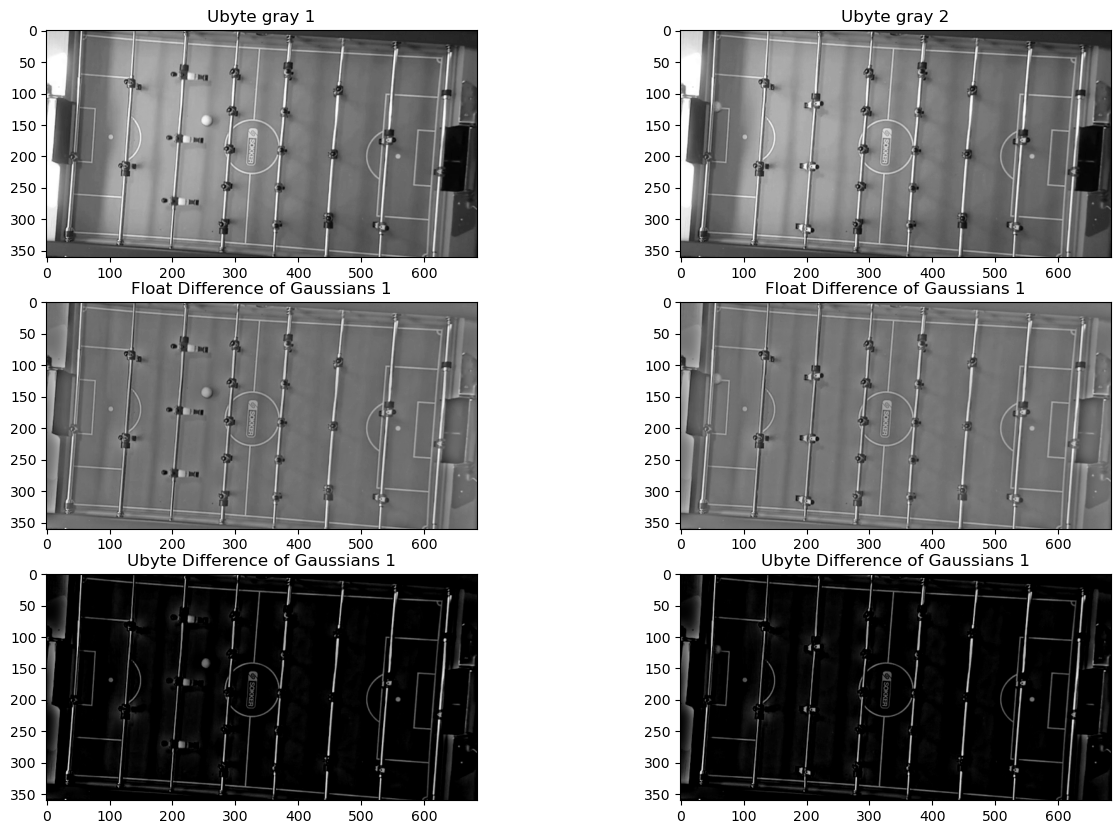

In [104]:
# TODO -- Apply a difference of gaussians on our grayscale baby-football images.

# 1. Importing the needed libraries
from skimage.filters import gaussian
# PUT YOUR CODE HERE

%matplotlib inline

# 2. Choosing the value of the low and the high sigma
low_sigma = 0
high_sigma = 10

# 3. Applying a gaussian filter with low_sigma on our images ubyte_gray1 and ubyte_gray2
gau_low1 = gaussian(ubyte_gray1, sigma=low_sigma)
gau_low2 = gaussian(ubyte_gray2, sigma=low_sigma)

# 4. Applying a gaussian filter with high_sigma on our images ubyte_gray1 and ubyte_gray2
gau_high1 = gaussian(ubyte_gray1, sigma=high_sigma)
gau_high2 = gaussian(ubyte_gray2, sigma=high_sigma)

# 5. Applying a difference of gaussians
float_dg_filter1 = gau_low1 - gau_high1
float_dg_filter2 = gau_low2 - gau_high2

# 6. Converts the results into ubytes
ubyte_dg_filter1 = img_as_ubyte(float_dg_filter1)
ubyte_dg_filter2 = img_as_ubyte(float_dg_filter2)

# 7. Displaying the results
plt.figure(figsize=(15,10))
plt.subplot(321)
plt.title("Ubyte gray 1")
plt.imshow(ubyte_gray1, cmap='gray')
plt.subplot(322)
plt.title("Ubyte gray 2")
plt.imshow(ubyte_gray2, cmap='gray')
plt.subplot(323)
plt.title("Float Difference of Gaussians 1")
plt.imshow(float_dg_filter1, cmap='gray')
plt.subplot(324)
plt.title("Float Difference of Gaussians 1")
plt.imshow(float_dg_filter2, cmap='gray')
plt.savefig('figs/difference-of-gaussians.png')
plt.subplot(325)
plt.title("Ubyte Difference of Gaussians 1")
plt.imshow(ubyte_dg_filter1, cmap='gray')
plt.subplot(326)
plt.title("Ubyte Difference of Gaussians 1")
plt.imshow(ubyte_dg_filter2, cmap='gray')
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [64]:
plt.close()

Ce can see on our results that only relevant details of our image remain with no information about the shadows.

We can notice clearly on the <font color='maroon'>float</font> results that the shadows are merely visibles but transforming our results into <font color='maroon'>ubyte</font> (or <font color='maroon'>uint8</font>) seems to be more valuable since we have something much closer to what we expect. <font size='5'>👍🏼😆</font>

The [difference of gaussian](https://en.wikipedia.org/wiki/Difference_of_Gaussians) is known for its great ability of dealing with the shadows.

Cool! <font size='5'>😎</font> That is really what we needed for our <font size='5'>🌔</font> shadow issues.

### <font color="dodgerblue">1.4. Finding the optimal threshold again</font>

The outputs of our preprocessing task is totally different from our original images but they seem to be cleaner and ready for the binarization step.

We hope to find another optimal threshold which will keep the ball visible for each frame of our video.

In [107]:
g_img1 = ubyte_dg_filter1
g_img2 = ubyte_dg_filter2
%run functions/hist_bin_slider2.ipynb

interactive(children=(FloatSlider(value=180.0, continuous_update=False, description='Threshold', max=255.0, st…

In [108]:
plt.close()

Yes!!! <font size='5'>✌🏽</font> We now can have a <font color='maroon'>unique threshold</font> for both our image cases that keeps the <font size='2'>⚽</font> ball <font size='5'>🙉</font> visible.

Hopefully it remains the same result for all the other frames. <font size='5'>🤞🏽</font>

### <font color="dodgerblue">1.5. What about an automated Otsu threshold this time?</font>

We did not have a chance to get an optimal automated threshold last time but now, after what we did during the preprocessing task, we give to it another attempt.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Get a threshold automatically by using Otsu and use it for a binarization.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

- <font color="maroon">ubyte_gray2:</font> another [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier


**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing <font color='maroon'>threshold_otsu</font> from <font size='2'>📚 </font><font color='maroon'>skimage.filters</font>
2. <font size='2'>⭕</font> Getting the threshold by calling <font size='2'>⚙</font> <font color='maroon'>threshold_otsu(...)</font> on our image <font color='maroon'>ubyte_dg_filter1</font>
3. <font size='2'>⭕</font> Applying a binary thresholding on our images <font color='maroon'>ubyte_dg_filter1</font> and <font color='maroon'>ubyte_dg_filter2</font> by calling <font size='2'>⚙</font> <font color='maroon'>bin_threshold(...)</font> and considering the threshold <font color='maroon'>otsu_threshold</font>
4. <font size='2'>⭕</font> Displaying the resulting image

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplified protype of the functions:

<font size='3'>⚙</font> **[threshold_otsu(g_img)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
- **Return**
    - threshold: a single intensity threshold that allows us to separate the foreground from the background
 
<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [threshold_otsu(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/otsu_on_difference_gaussians.png"/>

</div>

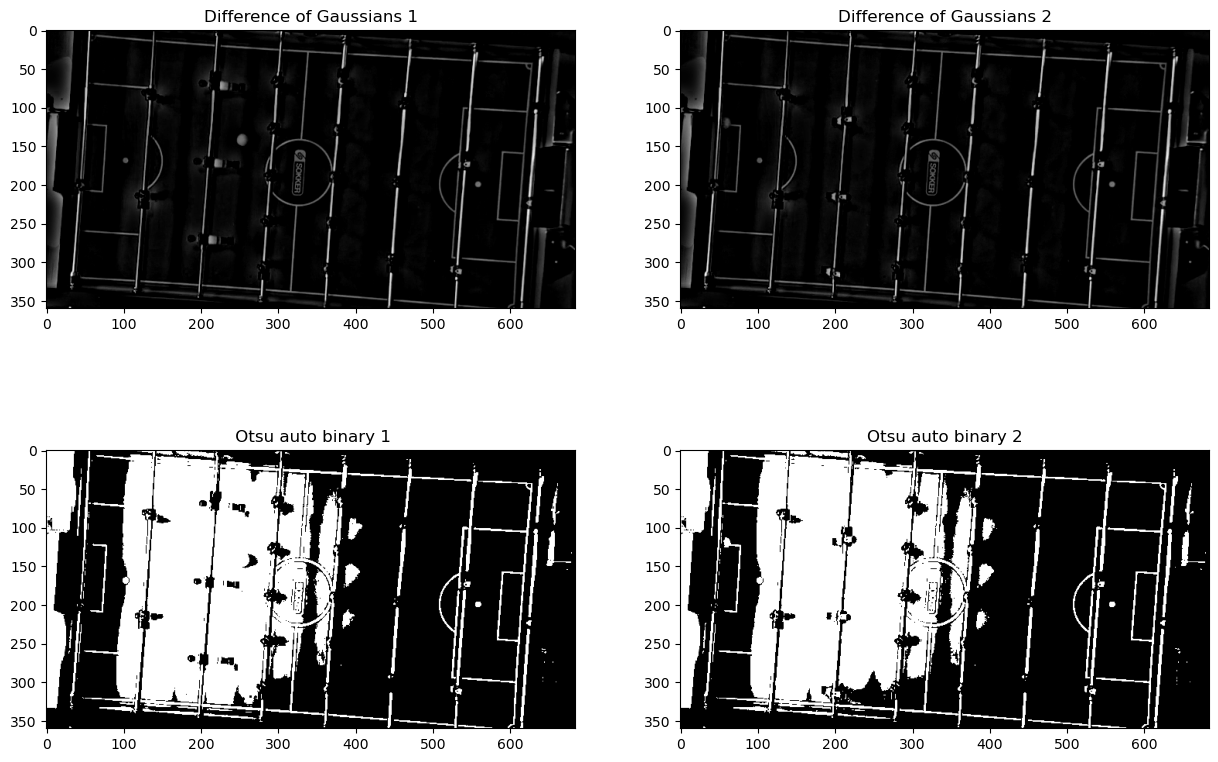

In [109]:
# TODO -- Get a threshold automatically by using Otsu and use it for a binarization
    
%matplotlib inline

# 1. Importing `threshold_otsu` from `skimage.filters`
from skimage.filters import threshold_otsu

# 2. Getting the threshold by calling `threshold_otsu(...)` on our images `ubyte_gray1`
otsu_threshold = threshold_otsu(ubyte_gray1)

# 3. Applying a binary thresholding on our images `ubyte_gray1` and `ubyte_gray2`
# by calling `bin_threshold(...)` and considering the threshold `otsu_threshold`
auto_bin1 = bin_threshold(ubyte_gray1, otsu_threshold)
auto_bin2 = bin_threshold(ubyte_gray2, otsu_threshold)

# 4. Displaying resulting image as your learning with `imshow(...)` and `show(...)`
fig = plt.figure(figsize=(15,10))
fig.canvas.header_visible = False
plt.subplot(221)
plt.title("Difference of Gaussians 1")
plt.imshow(ubyte_dg_filter1, cmap='gray')
plt.subplot(222)
plt.title("Difference of Gaussians 2")
plt.imshow(ubyte_dg_filter2, cmap='gray')
plt.subplot(223)
plt.title(" Otsu auto binary 1")
plt.imshow(auto_bin1, cmap='gray')
plt.subplot(224)
plt.title("Otsu auto binary 2")
plt.imshow(auto_bin2, cmap='gray')
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [110]:
plt.close()

<font color='purple'>**Great!!!**</font> <font size='5'>😁</font> 

We now can use an <font size='3'>🤖</font> automated thresholding binarization due to the <font color='green'>**success**</font> of our <font color='green'>**preprocessing**</font> step.

It is so relieving to not having to find a threshold manually. <font size='5'>😅</font>

As a conclusion, a <font color='maroon' size='4'>good preprocessing</font> step really <font color='maroon' size='4'>worth it 👍🏼</font> even if it will certainly add a some <font size='5'>⌚</font> times on the computation cost later. 

## <font color="dodgerblue">2. Video binarization after preprocessing</font>

Let's use what we learned in order to get segmentation results from our video.

### <font color="dodgerblue">2.1. Binarization function</font>

We have first to update our pipeline into a function that we will name <font color='maroon'>image_processing_v2(...)</font> so we can apply it to each frame of our video.
In order to achieve our goal of **baby-football detection and tracking**, we will have to update this function <font color='maroon'>step by step</font>. <font size='2'>👣</font> <font size='3'>👣</font> <font size='5'>👣</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to update our previous pipeline and level up our image processing function.<font size='5'>🔨</font>**

Use what we have learned from the previous exercises to fulfil this task.

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">image1:</font> color image to consider

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing the required python modules
2. <font size='2'>⭕</font> Defining the function according to the prototype
3. <font size='2'>⭕</font> Transforming the RGB color image <font color='maroon'>image</font> into a grayscale image
4. <font size='2'>⭕</font> Transforming the grayscale image so we get values in <font color='maroon'>[0, 255]</font>
5. <font size='2'>⭕</font> Applying a [difference of Gaussians](https://en.wikipedia.org/wiki/Difference_of_Gaussians) and get a <font color='maroon'>ubyte</font> version of it
6. <font size='2'>⭕</font> Getting the automated [Otsu thresholding](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Otsu%2527s_method&ved=2ahUKEwi5yNLh67GHAxWzdqQEHZmGCiEQFnoECEYQAQ&usg=AOvVaw1C36nef-R4Kwv4xl7UE1Cn)
7. <font size='2'>⭕</font> Binarizing the ubyte grayscale image by using the [Otsu thresholding](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Otsu%2527s_method&ved=2ahUKEwi5yNLh67GHAxWzdqQEHZmGCiEQFnoECEYQAQ&usg=AOvVaw1C36nef-R4Kwv4xl7UE1Cn) <font color='maroon'>oth</font> and returning the result
8. <font size='2'>✅</font> Testing the function and showing the result

**<font size='2'>✨</font> <font color='teal'>Prototype of the function to implement:</font>**

<font size='3'>⚙</font> **image_processing_v2(image, threshold)**
- **Parameters**
    - image: rgb color image to treat
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation, the value should be in <font color='maroon'>[0, 255]</font> or <font color='red'>'Otsu'</font> by default
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) simplified binary image

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplyfied protypes to consider:

<font size='3'>⚙</font> **[color.rgb2gray(rgb_image)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)**
- **Parameter**
    - rgb_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
- **Return**
    - grayscale_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
 
<font size='3'>⚙</font> **[img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte)**
- **Parameters**
    - img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) representing the image to convert
- **Return**
    - ubyte_image: <font color="maroon">uint8</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) 

<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [color.rgb2gray(rgb_image)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) and this another one <font size='2'>🔗</font> [img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/bin_180_res.png"/>

</div>

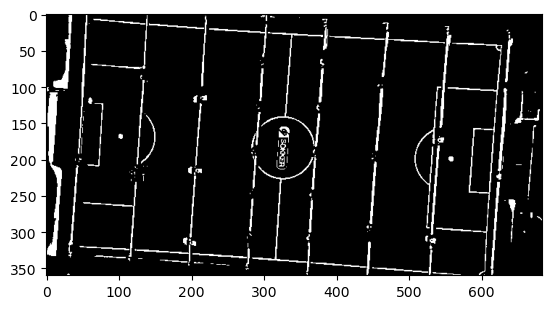

In [122]:
# TODO -- Update our previous pipeline and level up our image processing function.

# 1. Importing the required python modules
# PUT YOUR CODE HERE
# PUT YOUR CODE HERE
# PUT YOUR CODE HERE

# 2. Defining the function according to the prototype
def image_processing_v2(image, threshold):

    # Preprocessing
    # 3. Transforming the RGB color image 'image' into a grayscale image
    grayscale = rgb2gray(image)

    # 4. Transforming the grayscale image so we get values in `[0, 255]`
    ubyte_gray = img_as_ubyte(grayscale)

    # 5. Applying a difference of Gaussians and get a ubyte version of it
    l_sigma = gaussian(ubyte_gray, sigma=low_sigma)
    h_sigma = gaussian(ubyte_gray, sigma=high_sigma)
    diff_gauss = l_sigma - h_sigma
    ubyte_filter = img_as_ubyte(diff_gauss)

    # 6. Getting the automated Otsu thresholding
    oth = threshold
    if threshold == 'otsu':
        oth = threshold_otsu(ubyte_filter)

    # Binarization
    # 7. Binarizing the ubyte grayscale by using the threshold Otsu `oth` and returning the result
    return bin_threshold(ubyte_filter, oth)

# 8. Testing the function and showing the result
threshold = 'otsu'
binarized2 = image_processing_v2(image2, threshold)

%matplotlib inline
plt.imshow(binarized2, cmap='gray')
# plt.savefig('figs/image_processing_v2_res.png', bbox_inches='tight')
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [ ]:
plt.close()

### <font color="dodgerblue">2.2. Video binarization and vizualization</font>

Let's apply the new version of our image processing pipeline on each frames of our video.

#### <font color="dodgerblue">2.2.1. Image processing on each video frame</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to apply our image processing function on each frame of a video.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Loading and getting the video frames
2. <font size='2'>⭕</font> Specifying an optimal threshold
3. <font size='2'>⭕</font> Calling the function <font size='3'>⚙</font> [treat_video(...)](functions/treat_video.html) to apply our <font size='3'>⚙</font> <font color='maroon'>image_processing_v2(...)</font> function on each frames of <font color='maroon'>video_frames</font>
4. <font size='2'>✅</font> Showing the length of the list containing the binary images result

**<font size='2'>✨</font> <font color='teal'>Functions to consider:</font>**

Here are the simplified prototypes of the functions to consider.

<font size='3'>⚙</font> **[treat_video(video_frames, threshold, our_func)](functions/treat_video.html)**
- **Parameters**
    - video_frames: sequence of frames to read. Each frame is an image so this is a <font color="maroon">list</font> of images.
    - threshold: grayscale value in <font color='maroon'>[0, 255]</font> to use for the binarization process.
    - our_func: a function that will be called for each frame of the video. This function is meant to gather a set of image processing tasks.
- **Return**
    - <font color='maroon'>treated_frames</font>: list of images corresponding to the results

<font size='3'>⚙</font> **image_processing_v2(image, threshold)**
- **Parameters**
    - image: rgb color image to treat
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation, the value should be in <font color='maroon'>[0, 255]</font> or <font color='red'>'Otsu'</font> by default
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) simplified binary image

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows:</font>**

```
165
```

<br/> This result corresponds to the number of treated images.

</div>

In [123]:
# TODO -- Apply a binarization process on each frame of a video

# 1. Loading and getting the video frames
video_frames = get_video_frames_from('videos/video_1_360.mp4')

# 2. Specifying an optimal threshold
threshold = 35

# 3. Calling the function 'treat_video(...)' to apply a binarization image processing on each frames of 'video_frames'
video_result = treat_video(video_frames, threshold, image_processing_v2)

# 4. Showing the length of the array containing the binary images result
len(video_result)

165

#### <font color="dodgerblue">2.2.2. Time cost</font> <font size='5'>⌛ 💵</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to get the time cost of our video treatment.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">video_frames</font>

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Calling the function <font size='2'>⚙</font> [treat_video(...)](functions/treat_video.html) to apply our <font size='3'>⚙</font> <font color='maroon'>image_processing_v2(...)</font> function on each frames of <font color='maroon'>video_frames</font> while using the [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) magic function

**<font size='2'>✨</font> <font color='teal'>Function to call:</font>**

Here is the prototype of the function to use.

<font size='3'>⚙</font> **[treat_video(video_frames, threshold, our_func)](functions/treat_video.html)**
- **Parameters**
    - video_frames: sequence of frames to read. Each frame is an image so this is a <font color="maroon">list</font> of images.
    - threshold: grayscale value in <font color='maroon'>[0, 255]</font> to use for the binarization process.
    - our_func: a function that will be called for each frame of the video. This function is meant to gather a set of image processing tasks.
- **Return**
    - <font color='maroon'>treated_frames</font> a list of images corresponding to the results

<font size='3'>⚙</font> **image_processing_v1(image, threshold)**
- **Parameters**
    - image: rgb color image to treat
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation, the value should be in <font color='maroon'>[0, 255]</font>
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) simplified binary image

**<font size='2'>✨</font> <font color='teal'>The output result should be similar (but not totally) as follows:</font>**

```
9.51 s ± 637 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```

<br/> What can we say about this result?

</div>

In [124]:
# TODO -- Get the time cost of our updated video treatment

%timeit treat_video(video_frames, threshold, image_processing_v2)

3.32 s ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The execution on the whole video is now more more expensive. <font size='5'>💵💰 😱</font>

There is no surprise though. Adding some tasks increases the time cost. <font size='5'>🤔</font>

Our mission will involve some difficult choices in order to <font size='5'>⚖</font> balance the <font size='5'>💪🏽</font> performance and the <font color='5'>⏲</font> cost of our algorithm.

This is not an easy task but let's stay confident about <font size='5'>🏹</font> reaching our main goal.

#### <font color="dodgerblue">2.2.3. Display of the video binarization</font>

For now, let's show and enjoy the result. <font size='5'>📺</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to play the video binarized result.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">video_result</font>

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Choosing an interval (in ms) between each frame display
2. <font size='2'>⭕</font> Displaying the video <font color='maroon'>video_result</font> by calling the function [play_video(...)](functions/play_video.html)

**<font size='2'>✨</font> <font color='teal'>Function to call:</font>**

<font size='3'>⚙</font> **[play_video(video_frames, interval, show_axis='on')](functions/play_video.html)**
- **Parameters**
    - video_frames: sequence of frames to read. Each frame is an image so this is a <font color="maroon">list</font> of images.
    - interval: time in millisecond (ms) between two frames.
    - show_axis: <font color="maroon">'on'</font> to show axis values, <font color="maroon">'off'</font> to hide them. Notice that this is not mandatory and it is set to <font color="maroon">'on'</font> by default.

**<font size='2'>✨</font> <font color='teal'>Output result:</font>**

You should see your resulting video displayed.

<font size='5'>⚠</font> Feel free to change the value of the <font color="maroon">interval</font> and experiment the changes and perhaps slow motions. <font size='5'>🐌</font>

</div>

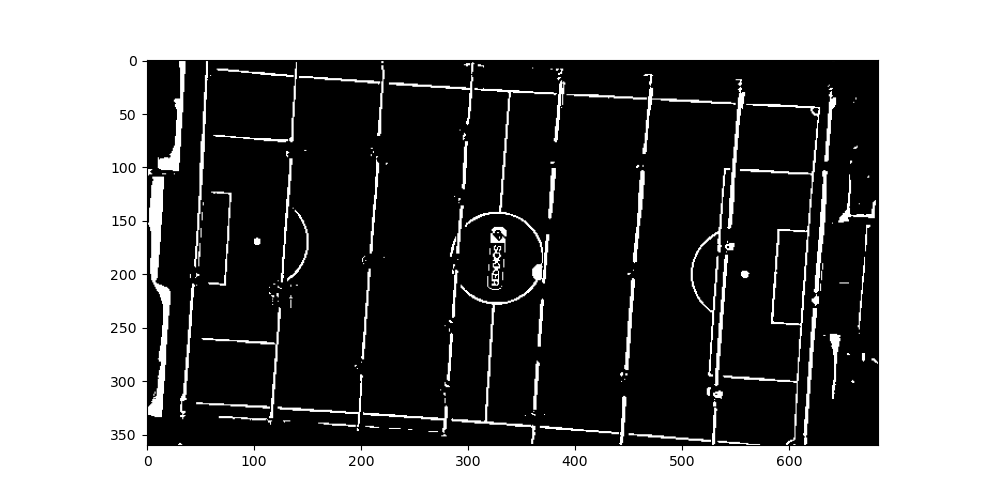

In [135]:
# TODO -- Play the result of the video binarization

%matplotlib widget

# 1. Choosing an interval (in ms) between each frame display
interval = 5

# 2. Displaying the video 'video_result' by calling the function 'play_video(...)'
play_video(video_result, interval, show_axis='on')


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [130]:
plt.close()

Is our result not COOL? <font size='5'>😎🍹</font>

We have a pretty clean intermediate result.

The next step is to **detect the <font size='5'>⚽</font> ball** by discriminating it from the other objects and artifacts.

<font color="purple">**Félicitations**</font> <font size='5'>❗🎉</font> 

You reached the end of this notebook and implemented the image processing pipeline bellow. <font size='5'>🥇</font>

## <font color="dodgerblue">Implemented pipeline</font>

<font size='4'>✅</font> **image_processing_<span style='color: white; background-color:   #f1948a; padding: 2px;'><b>v2</b></span>**
* <font color="dodgerblue">**Preprocessing**</font>
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> RGB image to grayscale image transformation
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> Grayscale image to ubyte image so we get values in <font color='maroon'>[0, 255]</font>
    - <span style='color: white; background-color:   #f1948a; padding: 2px;'><b>v2</b></span> Difference of gaussians to get rid of shadows
* <font color="dodgerblue">**Segmentation**</font>
    - <span style='color: white; background-color:   #f1948a; padding: 2px;'><b>v2</b></span> Binarization using an otsu automated threshold